In [ ]:
import pandas as pd
from datetime import datetime as dt
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

Вычислять новые признаки будем на основе тренировочной выборки (она же train), а применять их будем ко всей выборке(train и test)

In [ ]:
data_train = pd.read_csv('tr_for_students.csv')
data_test = pd.read_csv('vl_for_students.csv')

In [ ]:
data_train

,issue_d,purpose,addr_state,sub_grade,home_ownership,emp_title,installment,dti,funded_amnt,annual_inc,...,mths_since_recent_inq,delinq_2yrs,chargeoff_within_12_mths,num_accts_ever_120_pd,num_tl_90g_dpd_24m,acc_open_past_24mths,avg_cur_bal,tot_hi_cred_lim,delinq_amnt,def
0,2012-01-01,debt_consolidation,IL,C3,RENT,Chicago Shakespeare Theatre,172.48,16.39,5000,21600.0,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0
1,2013-01-01,debt_consolidation,FL,B4,MORTGAGE,Queen of Pawns,674.94,16.31,20000,95000.0,...,4.0,0,0,0.0,0.0,4.0,23735.0,153379.0,0,0
2,2013-07-01,debt_consolidation,NJ,B5,RENT,tek services,809.24,14.01,24000,90000.0,...,19.0,0,0,0.0,0.0,5.0,4070.0,50834.0,0,0
3,2014-03-01,debt_consolidation,MI,C2,MORTGAGE,Inventory Control,342.56,14.51,10000,43000.0,...,5.0,1,1,4.0,1.0,3.0,1127.0,32683.0,0,0
4,2013-10-01,credit_card,TX,D2,MORTGAGE,Business Analyst,473.58,22.65,13000,62000.0,...,5.0,0,0,0.0,0.0,5.0,3443.0,59495.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61164,2013-02-01,debt_consolidation,CA,A5,RENT,Cupertino Union School District,583.47,7.96,18375,133325.0,...,NaN,1,0,1.0,1.0,1.0,5278.0,48557.0,0,0
61165,2013-07-01,debt_consolidation,TX,A5,MORTGAGE,Los Fresnos CISD,341.72,20.97,16500,82000.0,...,1.0,0,0,0.0,0.0,3.0,18594.0,333493.0,0,0
61166,2013-04-01,debt_consolidation,FL,D1,RENT,Publix,245.06,33.65,6800,27000.0,...,5.0,0,0,1.0,0.0,5.0,2093.0,36095.0,0,0
61167,2010-10-01,debt_consolidation,TX,B5,MORTGAGE,us postal,107.73,18.48,3250,58000.0,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,0


In [ ]:
train = data_train
test = data_test
y = train['def']
y_test = test['def']
train = train.reset_index().drop(columns = 'index')
test = test.reset_index().drop(columns = 'index')

In [ ]:
import numpy as np
numeric_data = train.select_dtypes([np.number]).columns
train[numeric_data].corrwith(y).sort_values(ascending=False)

def                         1.000000
term                        0.153506
acc_open_past_24mths        0.078532
dti                         0.074369
inq_last_6mths              0.061401
funded_amnt                 0.052149
installment                 0.030775
delinq_2yrs                 0.010025
num_accts_ever_120_pd       0.009013
num_tl_90g_dpd_24m          0.004032
delinq_amnt                 0.001155
emp_length                 -0.001309
chargeoff_within_12_mths   -0.007979
mths_since_recent_inq      -0.049855
annual_inc                 -0.054393
tot_hi_cred_lim            -0.057962
avg_cur_bal                -0.062208
dtype: float64

In [ ]:
descript = pd.read_excel('Columns description.xlsx')

In [ ]:
descript

,Unnamed: 0,Field,Description
0,1,issue_d,The month which the loan was funded
1,2,purpose,A category provided by the borrower for the lo...
2,3,addr_state,The state provided by the borrower in the loan...
3,4,sub_grade,External assigned loan subgrade
4,5,home_ownership,The home ownership status provided by the borr...
5,6,emp_title,The job title supplied by the Borrower when ap...
6,8,installment,The monthly payment owed by the borrower if th...
7,9,dti,A ratio calculated using the borrower’s total ...
8,10,funded_amnt,The total amount committed to that loan at tha...
9,11,annual_inc,The self-reported annual income provided by th...


Создадим столбец для года + месяца

In [ ]:
train['year_month'] = train.issue_d.apply(lambda x: datetime.date(dt.fromisoformat(x).year, dt.fromisoformat(x).month, 1))
test['year_month'] = test.issue_d.apply(lambda x: datetime.date(dt.fromisoformat(x).year, dt.fromisoformat(x).month, 1))

In [ ]:
groupby_year_month = train.groupby('year_month').agg({'def':'sum'}).reset_index()
groupby_year_month_total = train.groupby('year_month').agg({'def':'count', 'dti':'mean', 'term':'mean'}).reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x = groupby_year_month['year_month'], y = groupby_year_month['def'], name = 'num_of_defaults'))
fig.add_trace(go.Scatter(x = groupby_year_month_total['year_month'], y = groupby_year_month_total['def'], name = 'num_of_debets'))
fig.show()

In [ ]:
groupby_year_month_total_merged = pd.merge(groupby_year_month_total, groupby_year_month, how = 'inner', on = 'year_month')

In [ ]:
groupby_year_month_total_merged['percent'] = groupby_year_month_total_merged['def_y']/groupby_year_month_total_merged['def_x']

Заметим, что процент дефолтов вырос с 2012 года

In [ ]:
fig = go.Figure()
fig.update_layout(title_text = 'Процент дефолтов по месяцам', title_x=0.5, title_y=0.9)
fig.add_trace(go.Scatter(x = groupby_year_month_total_merged['year_month'], y = groupby_year_month_total_merged['percent'], name = 'percent of defolts'))
fig.show()

В целом наблюдения по месяцам постепенно растут, каких-то резких просадок нет, давайте рассмотрим среднее значение dti по месяцам

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = groupby_year_month_total['year_month'], y = groupby_year_month_total['dti'], name = 'dti(description in dataset)'))
fig.add_trace(go.Scatter(x = groupby_year_month_total['year_month'], y = groupby_year_month_total['term'], name = 'term'))

## Пропущенные значения/Разделение выборки на 2 части

Давайте взглянем на пропуски

In [ ]:
train.isna().sum()

issue_d                         0
purpose                         0
addr_state                      0
sub_grade                       0
home_ownership                  0
emp_title                    3865
installment                     0
dti                             0
funded_amnt                     0
annual_inc                      0
emp_length                   2674
term                            0
inq_last_6mths                  0
mths_since_recent_inq       13529
delinq_2yrs                     0
chargeoff_within_12_mths        0
num_accts_ever_120_pd       11941
num_tl_90g_dpd_24m          11941
acc_open_past_24mths         7886
avg_cur_bal                 11945
tot_hi_cred_lim             11941
delinq_amnt                     0
def                             0
year_month                      0
dtype: int64

In [ ]:
groupby_year_month_total_new = train[train.num_accts_ever_120_pd.isna()].groupby('year_month').count().reset_index()
groupby_year_month_total = train.groupby('year_month').count().reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x = groupby_year_month_total['year_month'], y = groupby_year_month_total['term'], name = 'number 0f loans'))
fig.add_trace(go.Scatter(x = groupby_year_month_total_new['year_month'], y = groupby_year_month_total_new['term'], name = 'number 0f loans'))

Получается, что до определенной даты, метрики 'num_accts_ever_120_pd', 'num_tl_90g_dpd_24m', 'avg_cur_bal', 'tot_hi_cred_lim' не заполнялись да и система кредитования была иной, из-за чего изменялся dti

In [ ]:
train[train.avg_cur_bal.isna()]['def'].mean() # доля дефолтов до 2012 года

0.16349937212222687

In [ ]:
train[train.avg_cur_bal.isna() == False]['def'].mean() #доля дефолтов после 2012 года

0.15864212579229645

In [ ]:
test.year_month.unique() #тестовая выборка состоит из дат сильно позже 2012 года, поэтому будет некорректно использовать первую выборку в нашей модели

array([datetime.date(2015, 4, 1), datetime.date(2014, 9, 1),
       datetime.date(2014, 10, 1), datetime.date(2014, 7, 1),
       datetime.date(2015, 1, 1), datetime.date(2014, 12, 1),
       datetime.date(2015, 5, 1), datetime.date(2014, 6, 1),
       datetime.date(2014, 11, 1), datetime.date(2015, 3, 1),
       datetime.date(2014, 8, 1), datetime.date(2015, 2, 1)], dtype=object)

In [ ]:
old_train = train.copy()

In [ ]:
train = train[train.avg_cur_bal.isna() == False]

## Анализ фичей

Рассматриваем пока распределение фичей, не делая выводов про процент дефолтов в них

In [ ]:
descript

,Unnamed: 0,Field,Description
0,1,issue_d,The month which the loan was funded
1,2,purpose,A category provided by the borrower for the lo...
2,3,addr_state,The state provided by the borrower in the loan...
3,4,sub_grade,External assigned loan subgrade
4,5,home_ownership,The home ownership status provided by the borr...
5,6,emp_title,The job title supplied by the Borrower when ap...
6,8,installment,The monthly payment owed by the borrower if th...
7,9,dti,A ratio calculated using the borrower’s total ...
8,10,funded_amnt,The total amount committed to that loan at tha...
9,11,annual_inc,The self-reported annual income provided by th...


<Axes: >

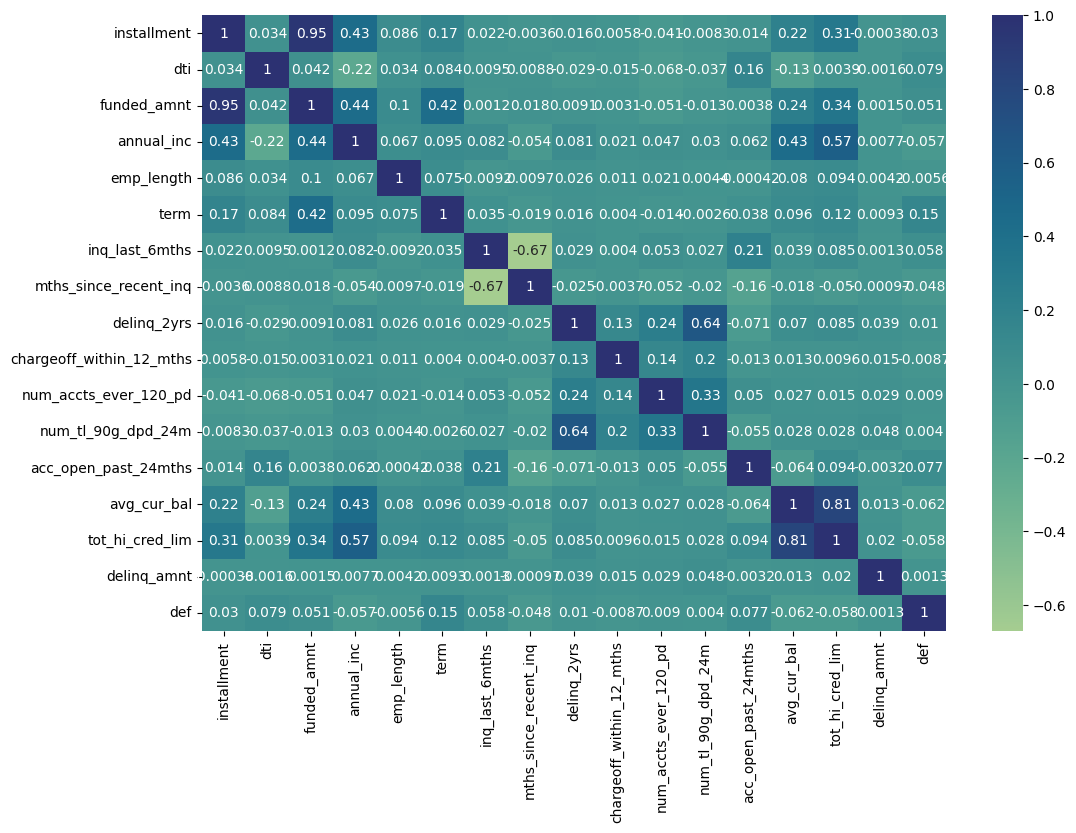

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap="crest")

In [ ]:
descript

,Unnamed: 0,Field,Description
0,1,issue_d,The month which the loan was funded
1,2,purpose,A category provided by the borrower for the lo...
2,3,addr_state,The state provided by the borrower in the loan...
3,4,sub_grade,External assigned loan subgrade
4,5,home_ownership,The home ownership status provided by the borr...
5,6,emp_title,The job title supplied by the Borrower when ap...
6,8,installment,The monthly payment owed by the borrower if th...
7,9,dti,A ratio calculated using the borrower’s total ...
8,10,funded_amnt,The total amount committed to that loan at tha...
9,11,annual_inc,The self-reported annual income provided by th...


Между собой коррелируют avg_cur_bal и tot_hi_cred_lim, и inq_last_6mths и mths_since_recent_inq, funded_amnt и installment, delinq_2yrs	и num_tl_90g_dpd_24m

Категориальные признаки: purpose, addr_state, home_ownership, sub_grade

<Axes: xlabel='sub_grade', ylabel='def'>

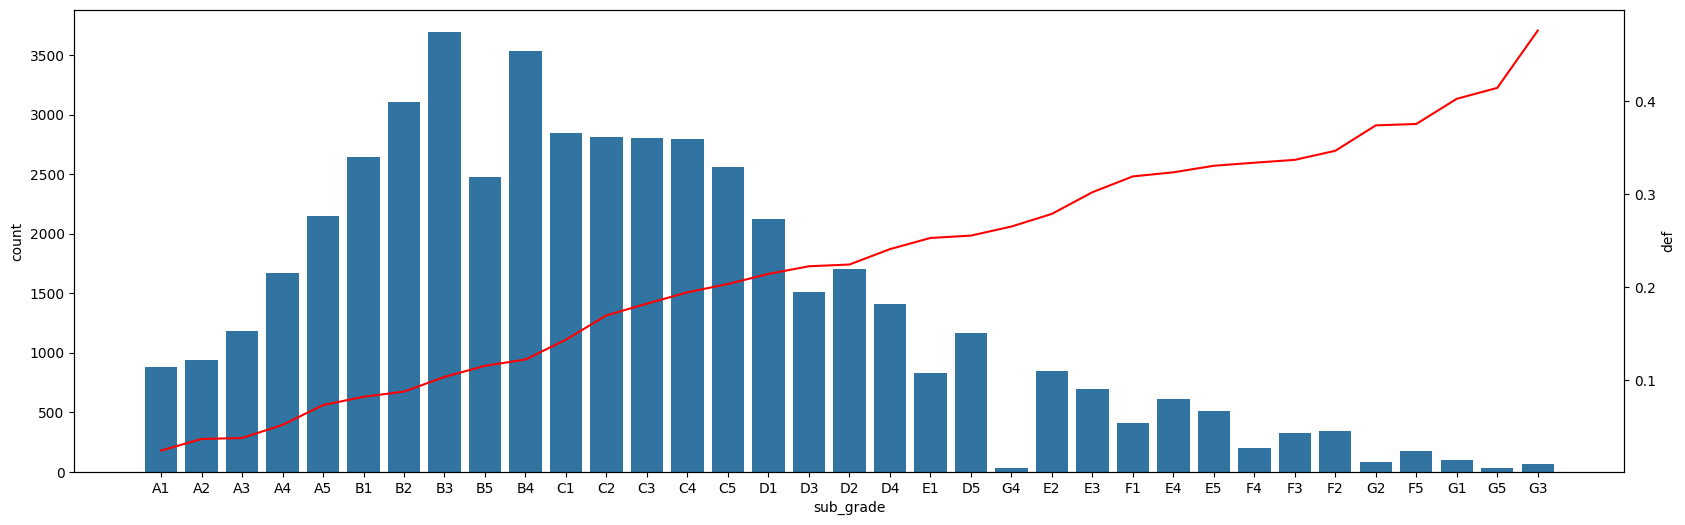

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 6))
plot_data = pd.merge(train[['def', 'sub_grade']].groupby('sub_grade').mean().reset_index().sort_values(by = 'def'), train[['sub_grade']].value_counts().reset_index(), on = 'sub_grade')
sns.barplot(data = plot_data, x = 'sub_grade', y = 'count', ax = ax1)
ax2 = ax1.twinx()
sns.lineplot(data = plot_data, x = 'sub_grade', y = 'def', ax = ax2, color = 'red')

F и G можно в будущем объединить в две категорию

<Axes: xlabel='purpose', ylabel='def'>

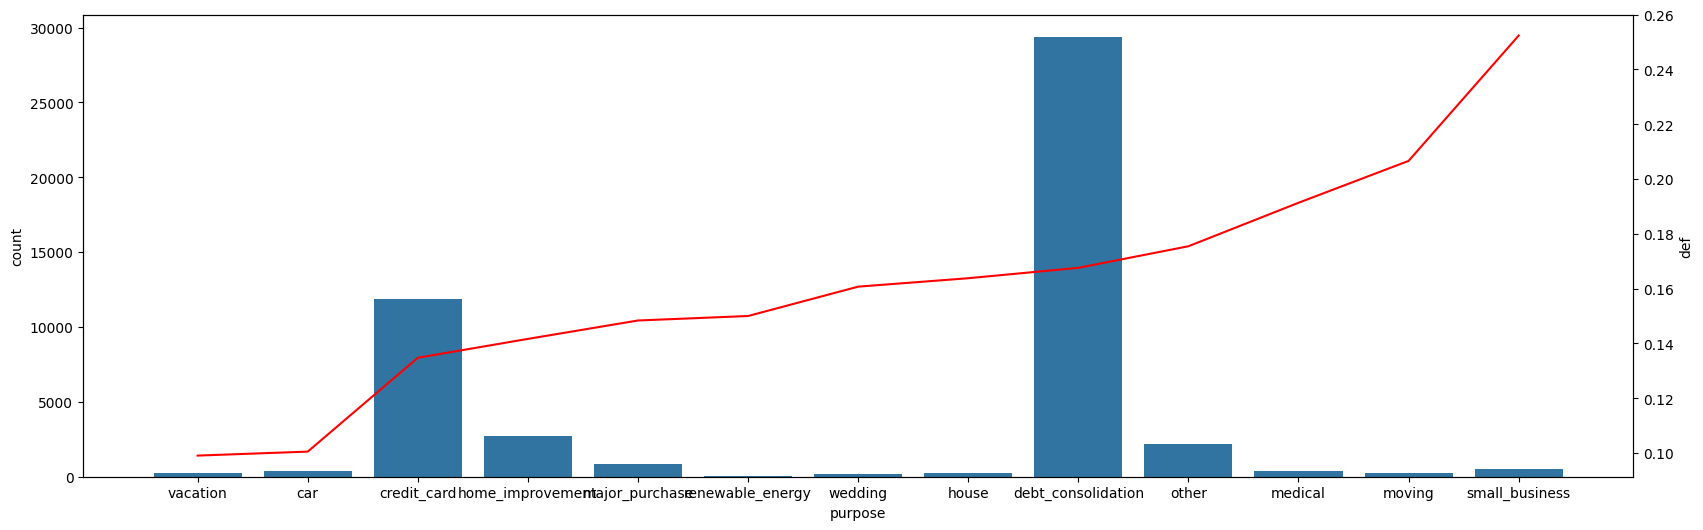

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 6))
plot_data = pd.merge(train[['def', 'purpose']].groupby('purpose').mean().reset_index().sort_values(by = 'def'), train[['purpose']].value_counts().reset_index(), on = 'purpose')
sns.barplot(data = plot_data, x = 'purpose', y = 'count', ax = ax1)
ax2 = ax1.twinx()
sns.lineplot(data = plot_data, x = 'purpose', y = 'def', ax = ax2, color = 'red')

<Axes: xlabel='home_ownership', ylabel='def'>

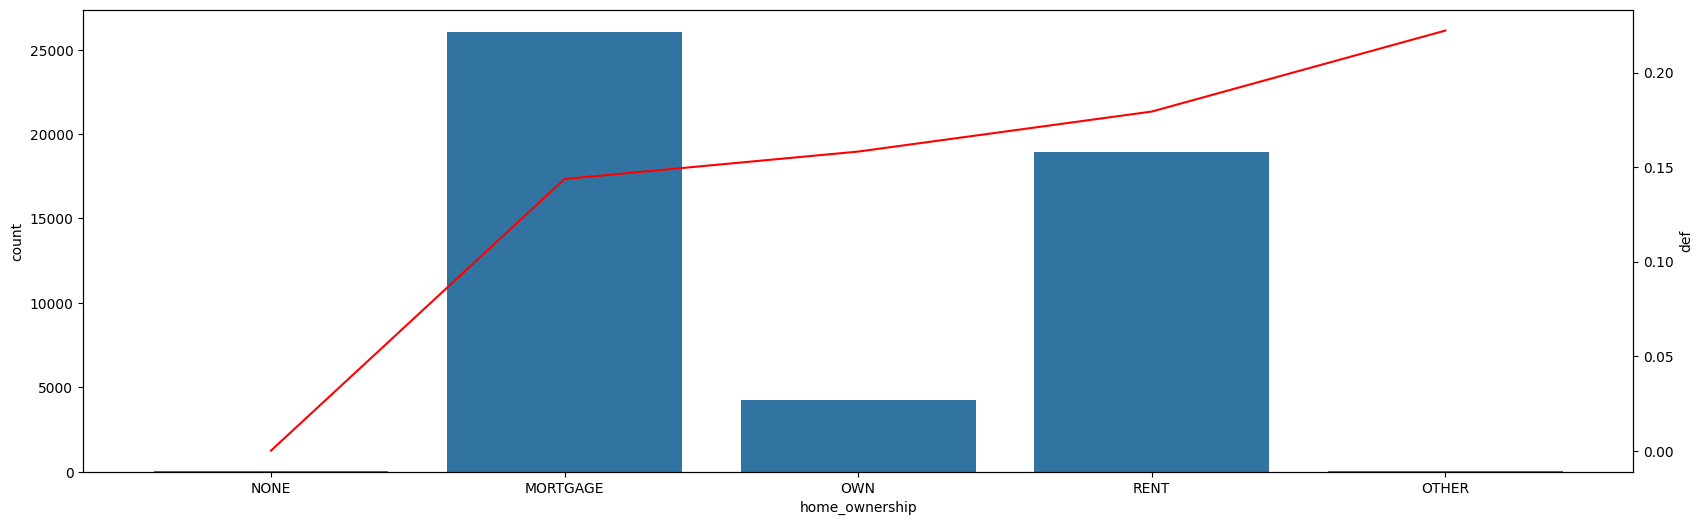

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 6))
plot_data = pd.merge(train[['def', 'home_ownership']].groupby('home_ownership').mean().reset_index().sort_values(by = 'def'), train[['home_ownership']].value_counts().reset_index(), on = 'home_ownership')
sns.barplot(data = plot_data, x = 'home_ownership', y = 'count', ax = ax1)
ax2 = ax1.twinx()
sns.lineplot(data = plot_data, x = 'home_ownership', y = 'def', ax = ax2, color = 'red')

<Axes: xlabel='addr_state', ylabel='def'>

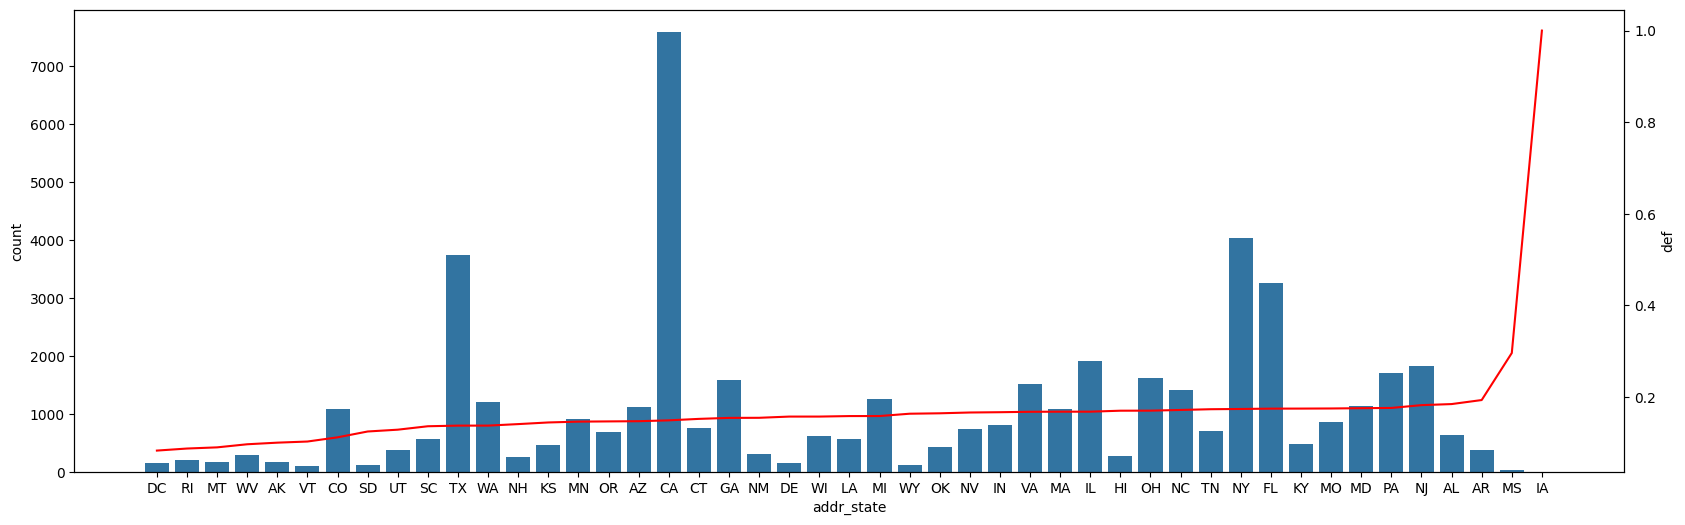

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 6))
plot_data = pd.merge(train[['def', 'addr_state']].groupby('addr_state').mean().reset_index().sort_values(by = 'def'), train[['addr_state']].value_counts().reset_index(), on = 'addr_state')
sns.barplot(data = plot_data, x = 'addr_state', y = 'count', ax = ax1)
ax2 = ax1.twinx()
sns.lineplot(data = plot_data, x = 'addr_state', y = 'def', ax = ax2, color = 'red')

Рассмотрим колонку emp_title, даже если группировать ее по одинаковым работам процент дефолта отличается не сильно, потом удалим эту колонку

In [ ]:
train.groupby('emp_title').agg({'issue_d':'count', 'def':'mean'}).sort_values(by = 'issue_d', ascending = False).head(30)

,issue_d,def
emp_title,,
Teacher,505,0.140594
Manager,420,0.173810
Registered Nurse,239,0.146444
RN,237,0.194093
Supervisor,183,0.229508
Project Manager,167,0.155689
Sales,149,0.140940
Office Manager,142,0.161972
manager,140,0.235714


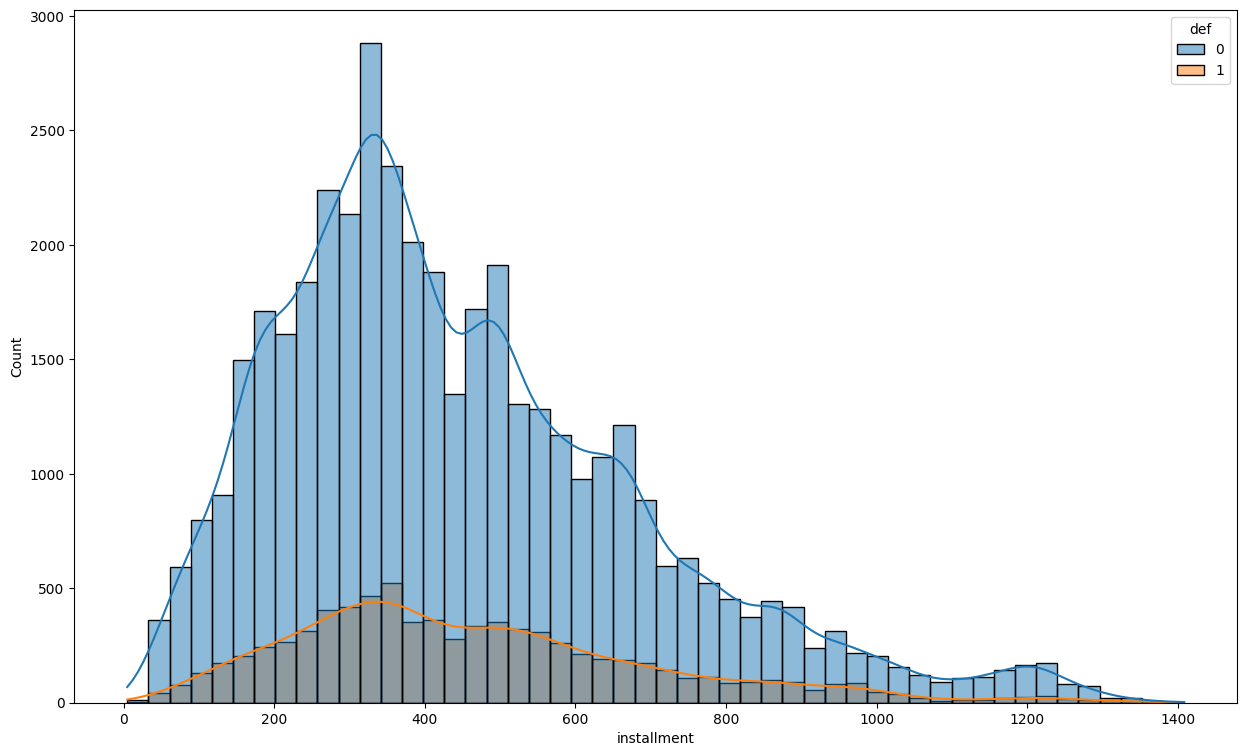

In [ ]:
plt.figure(figsize=(15, 9))
sns.histplot(data = train, x = 'installment', hue = 'def', kde=True, bins = 50)
plt.show()

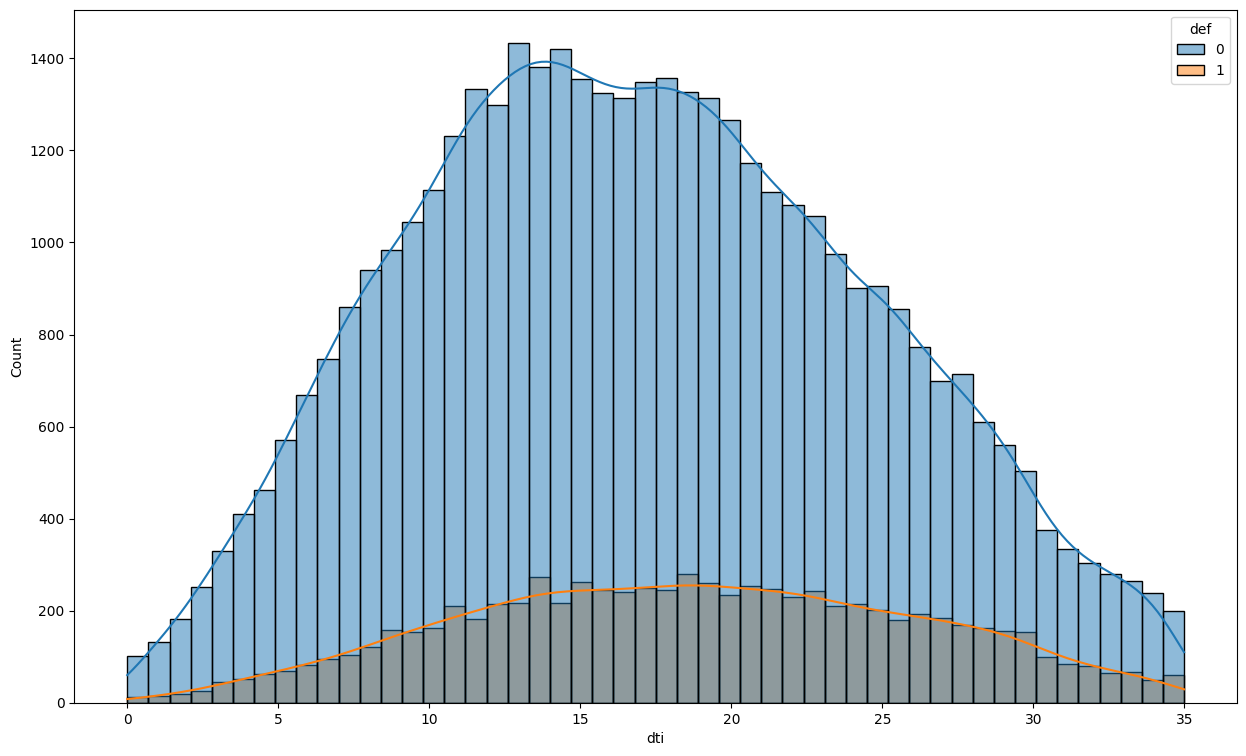

In [ ]:
plt.figure(figsize=(15, 9))
sns.histplot(data = train, x = 'dti', hue = 'def', kde=True, bins = 50) #тут все похоже на нормальное, все хорошо
plt.show()

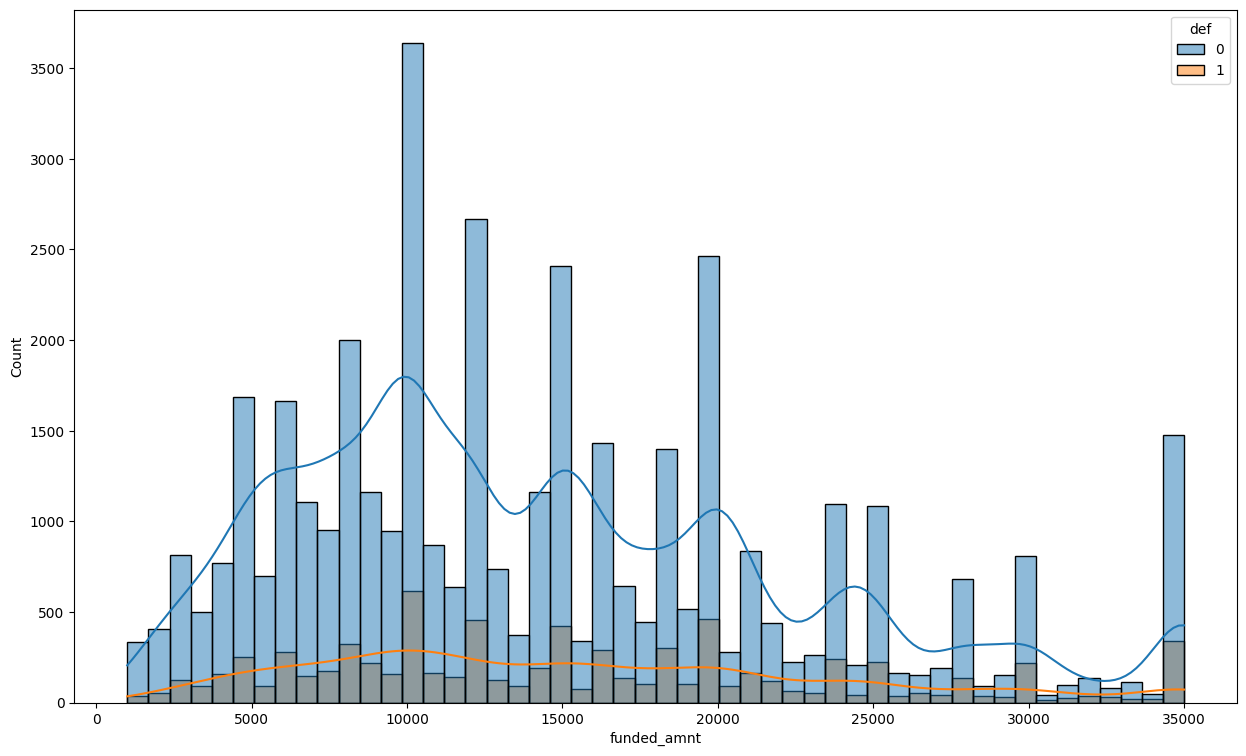

In [ ]:
plt.figure(figsize=(15, 9))
sns.histplot(data = train, x = 'funded_amnt', hue = 'def', kde=True, bins = 50)
plt.show()

Распределение funded_amnt не очень подходит под нормальное, кроме того оно очени сильно коррелирует с installment его мы удалим

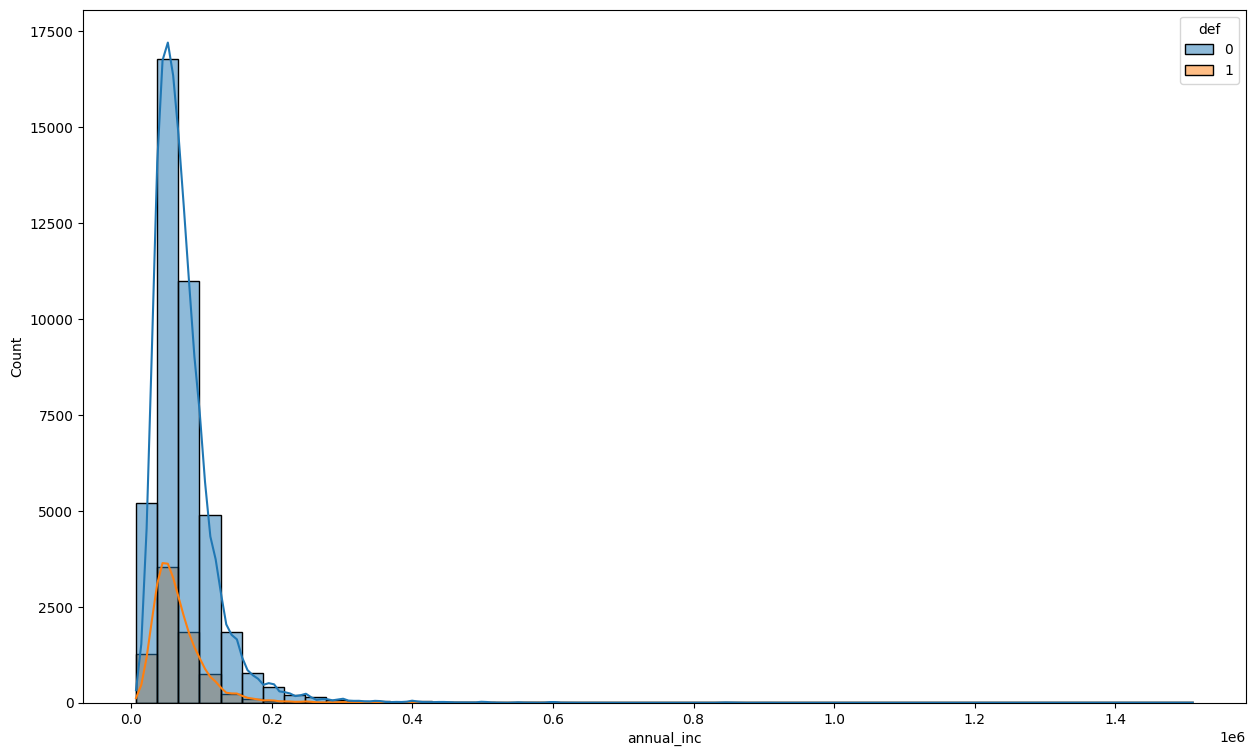

In [ ]:
plt.figure(figsize=(15, 9))
sns.histplot(data = train, x = 'annual_inc', hue = 'def', kde=True, bins = 50)
plt.show()

Видимо у некоторых людей слишком большой доход

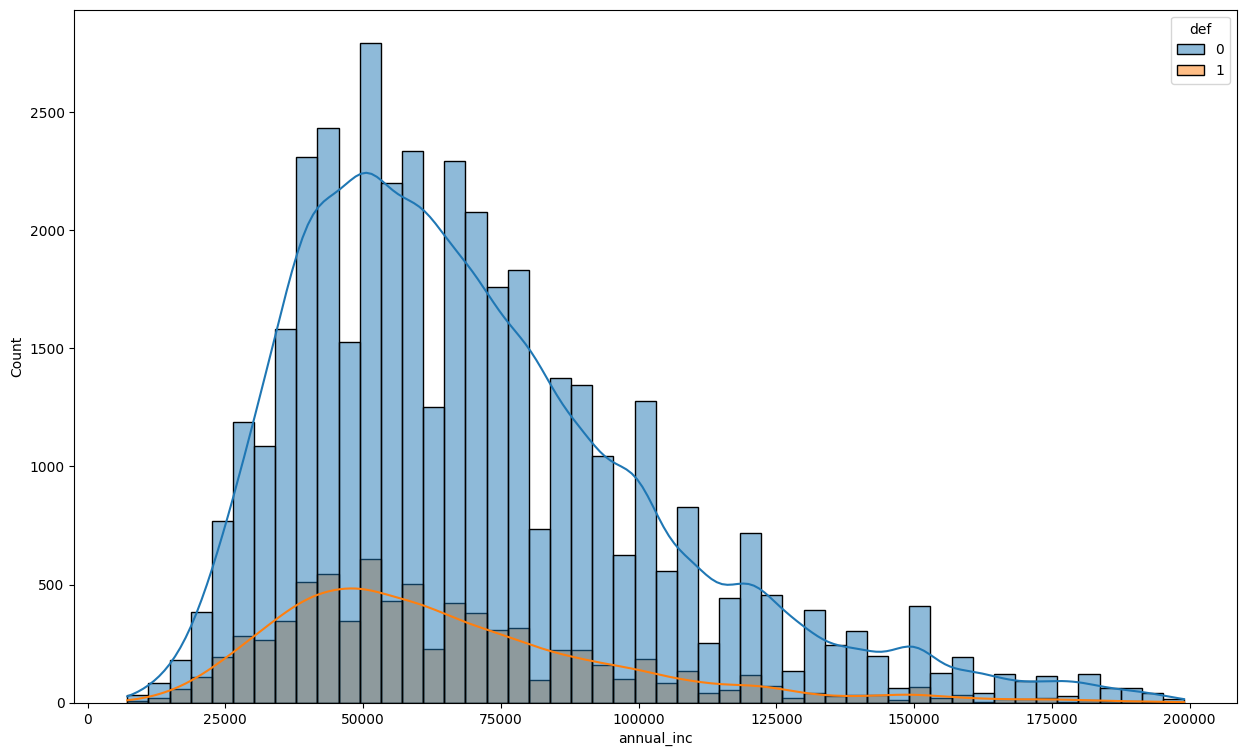

In [ ]:
plt.figure(figsize=(15, 9))
sns.histplot(data = train[train.annual_inc < 200000], x = 'annual_inc', hue = 'def', kde=True, bins = 50)
plt.show()

In [ ]:
train[train.annual_inc > 200000]['def'].mean() #процент дефолтов в полтора раза меньше при очень большом доходе, так как мы в любом случаее строим

0.09565217391304348

In [ ]:
train[(train.annual_inc > 190000) & (train.annual_inc < 200000)]['def'].mean() #но процент дефолтов при доходе близком к 200000$ примерно такой же

0.09090909090909091

Поэтому при прогнозе будем обрезать высокие доходы до 200000

Рассмотрим длину трудоустройства

In [ ]:
train.groupby('emp_length').agg({'def':'mean', 'issue_d':'count'})

,def,issue_d
emp_length,,
0.0,0.162310,3481
1.0,0.161842,2867
2.0,0.152489,4138
3.0,0.149878,3683
4.0,0.158754,2696
5.0,0.172944,3319
6.0,0.159420,2829
7.0,0.151691,2927
8.0,0.166052,2439


Нет явной зависимости между длиной трудойстройства и таргетом, так что этот признак не пройдет WOE, хотя у нас очень много признаков где длина трудоустройства >= 10, где неплохой таргет, так что можно закодировать его

In [ ]:
train.groupby('term').agg({'def':'mean', 'issue_d':'count'}) #хороший признак

,def,issue_d
term,,
36,0.125381,36465
60,0.253703,12759


In [ ]:
train.groupby('inq_last_6mths').agg({'def':'mean', 'issue_d':'count'}) #тут можно подумать о том, чтобы также подрезать до 4, потому что при большем количестве, чем 4 скачут значения

,def,issue_d
inq_last_6mths,,
0,0.138830,24937
1,0.169271,13824
2,0.184740,6409
3,0.198874,2841
4,0.221302,845
5,0.179775,267
6,0.232323,99
7,0.000000,2


In [ ]:
train.groupby('mths_since_recent_inq').agg({'def':'mean', 'issue_d':'count'})

,def,issue_d
mths_since_recent_inq,,
0.0,0.190895,3866
1.0,0.201592,4648
2.0,0.180185,3674
3.0,0.175276,3349
4.0,0.168329,3208
5.0,0.159445,2885
6.0,0.159202,2657
7.0,0.149494,2669
8.0,0.145798,2380


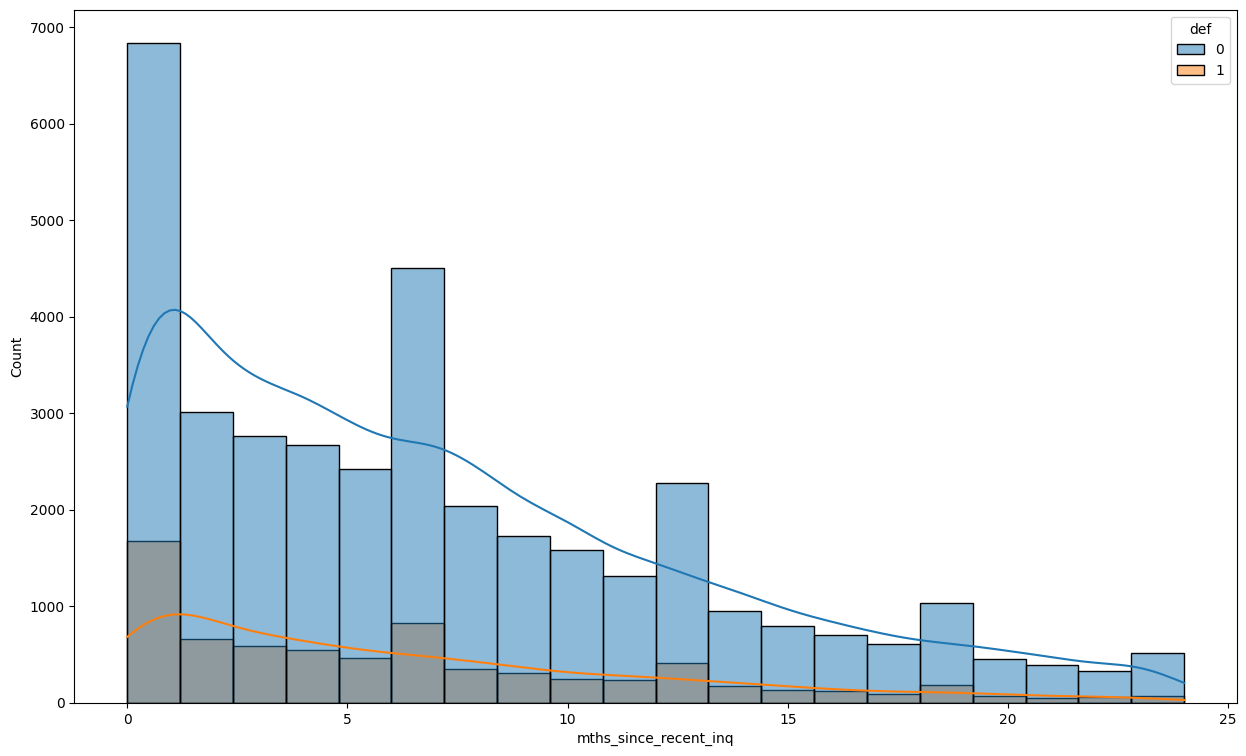

In [ ]:
plt.figure(figsize=(15, 9))
sns.histplot(data = train, x = 'mths_since_recent_inq', hue = 'def', kde=True, bins = 20)
plt.show()

'mths_since_recent_inq' ставим под вопрос, потому что он и так коррелирует с inq_last_6_months

In [ ]:
train.groupby('delinq_2yrs').agg({'def':'mean', 'issue_d':'count'}) #тут закодируем только delinq_2yrs == 0 и delinq_2yrs > 0

,def,issue_d
delinq_2yrs,,
0,0.156249,40301
1,0.168184,6041
2,0.160202,1779
3,0.214165,593
4,0.185185,243
5,0.170543,129
6,0.103448,58
7,0.193548,31
8,0.200000,15


In [ ]:
train.groupby('chargeoff_within_12_mths').agg({'def':'mean', 'issue_d':'count'}) # плохой признак, почти все значения одинаковые

,def,issue_d
chargeoff_within_12_mths,,
0,0.158916,48875
1,0.123779,307
2,0.078947,38
3,0.250000,4


In [ ]:
train.groupby('num_accts_ever_120_pd').agg({'def':'mean', 'issue_d':'count'}) #аналогично оставим 0 и >0

,def,issue_d
num_accts_ever_120_pd,,
0.0,0.155540,39424
1.0,0.176947,5561
2.0,0.161582,2098
3.0,0.177060,898
4.0,0.167954,518
5.0,0.123711,291
6.0,0.147208,197
7.0,0.171717,99
8.0,0.155556,45


In [ ]:
train.groupby('num_tl_90g_dpd_24m').agg({'def':'mean', 'issue_d':'count'}) #плохой признак

,def,issue_d
num_tl_90g_dpd_24m,,
0.0,0.157790,46581
1.0,0.181141,2015
2.0,0.142857,434
3.0,0.149425,87
4.0,0.192308,52
5.0,0.312500,16
6.0,0.066667,15
7.0,0.000000,2
8.0,0.333333,6


In [ ]:
train.groupby('acc_open_past_24mths').agg({'def':'mean', 'issue_d':'count'}) #здесь обрежем до 8, т.к. потом значений мало

,def,issue_d
acc_open_past_24mths,,
0.0,0.111826,2486
1.0,0.124070,5376
2.0,0.135103,7498
3.0,0.144908,8150
4.0,0.161312,7377
5.0,0.172639,5972
6.0,0.187143,4371
7.0,0.188235,3060
8.0,0.216744,1947


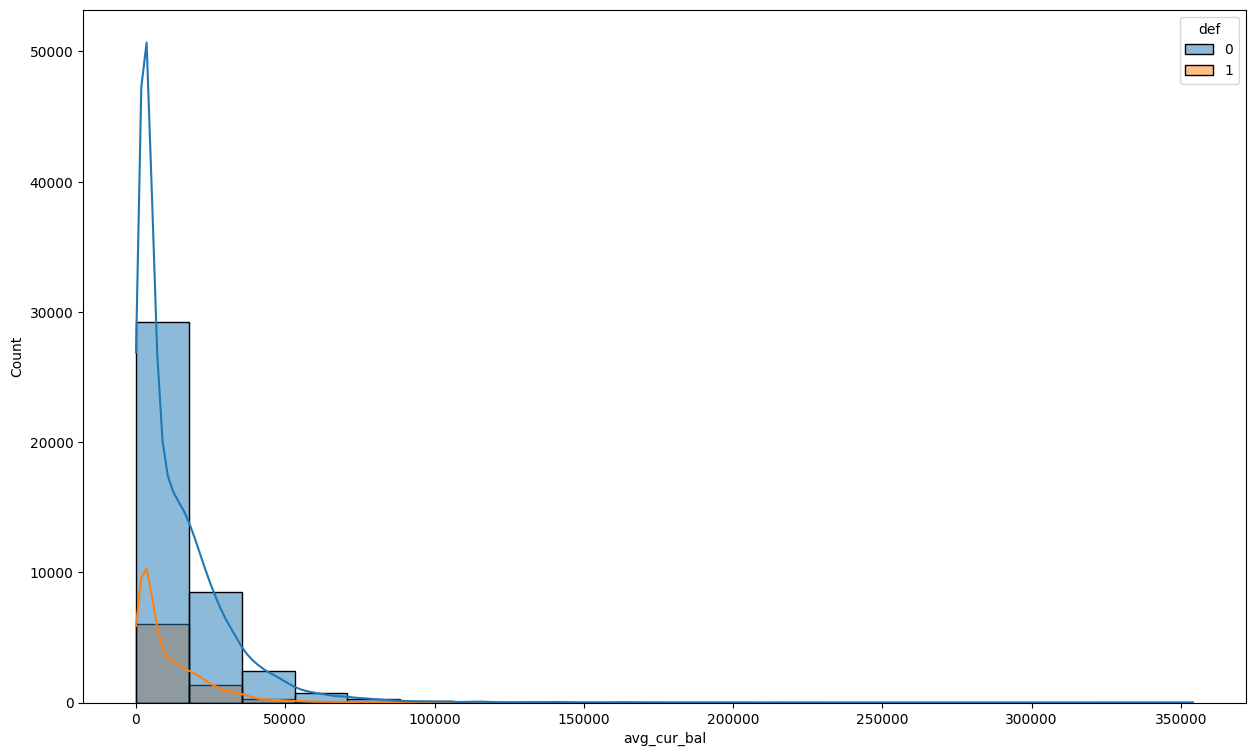

In [ ]:
plt.figure(figsize=(15, 9))
sns.histplot(data = train, x = 'avg_cur_bal', hue = 'def', kde=True, bins = 20)
plt.show()

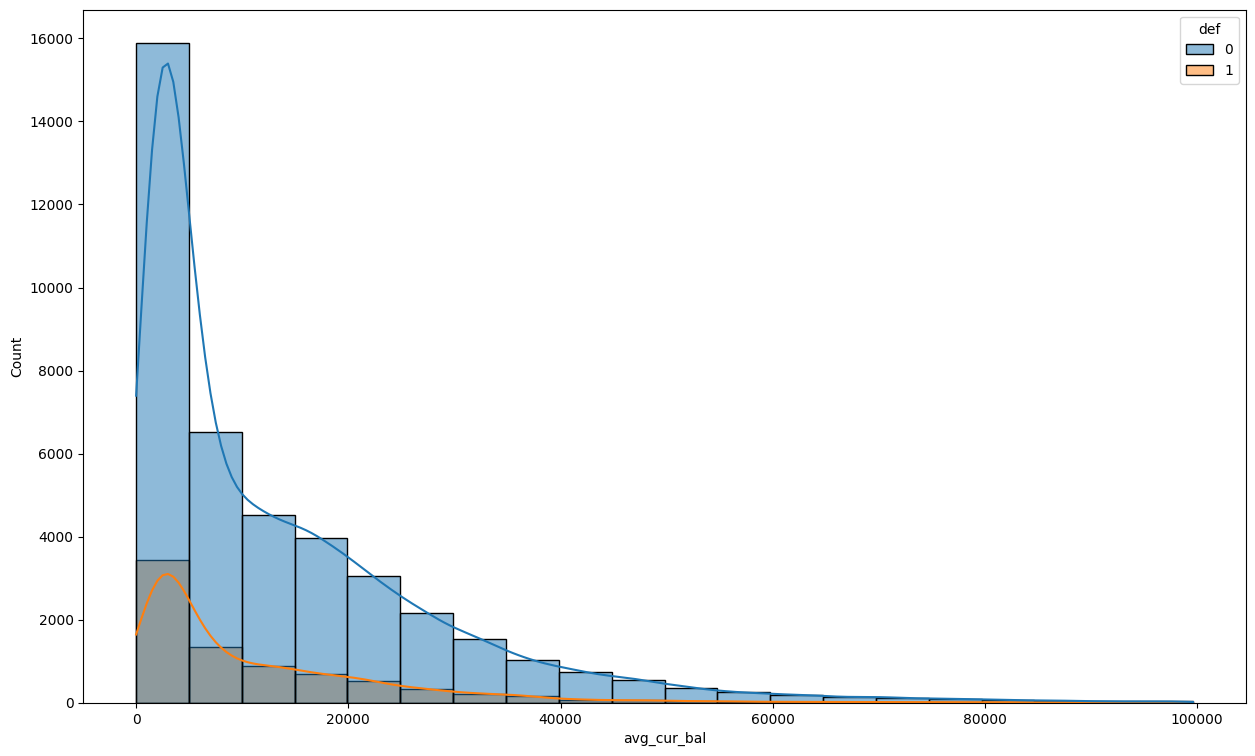

In [ ]:
plt.figure(figsize=(15, 9))
sns.histplot(data = train[train['avg_cur_bal'] < 100000], x = 'avg_cur_bal', hue = 'def', kde=True, bins = 20)
plt.show()

В этом признаке тоже очень есть относительно большие значения

In [ ]:
train[(train['avg_cur_bal'] < 50000) & (train['avg_cur_bal'] > 40000)]['def'].mean()

0.0908445706174592

In [ ]:
train[train['avg_cur_bal'] >= 50000]['def'].mean()

0.08492975734355045

Судя по среднему таргету мы можем обрезать слишком большие значения до 50000

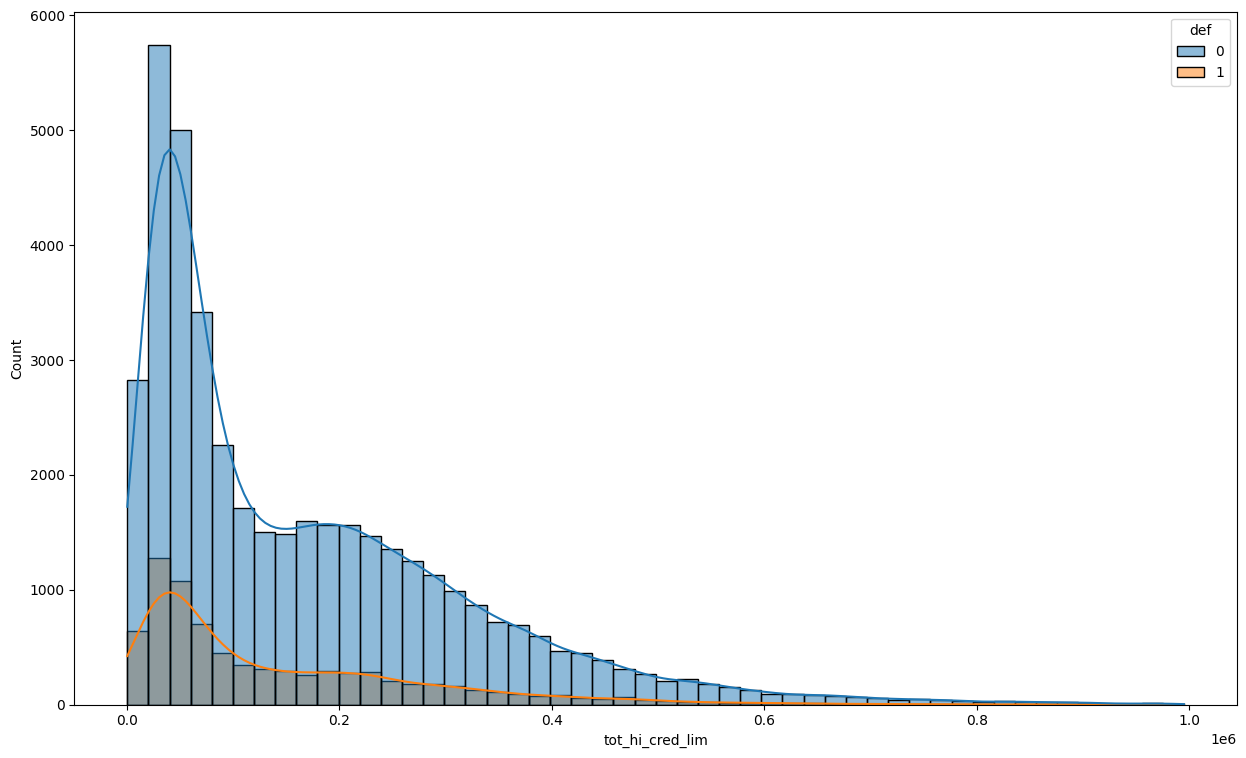

In [ ]:
plt.figure(figsize=(15, 9))
sns.histplot(data = train[train['tot_hi_cred_lim'] < 1000000], x = 'tot_hi_cred_lim', hue = 'def', kde=True, bins = 50)
plt.show()

Такая же ситуация, как с avg_cur_bal, т.к. эти величины коррелируют, то tot_hi_cred_lim придется удалить

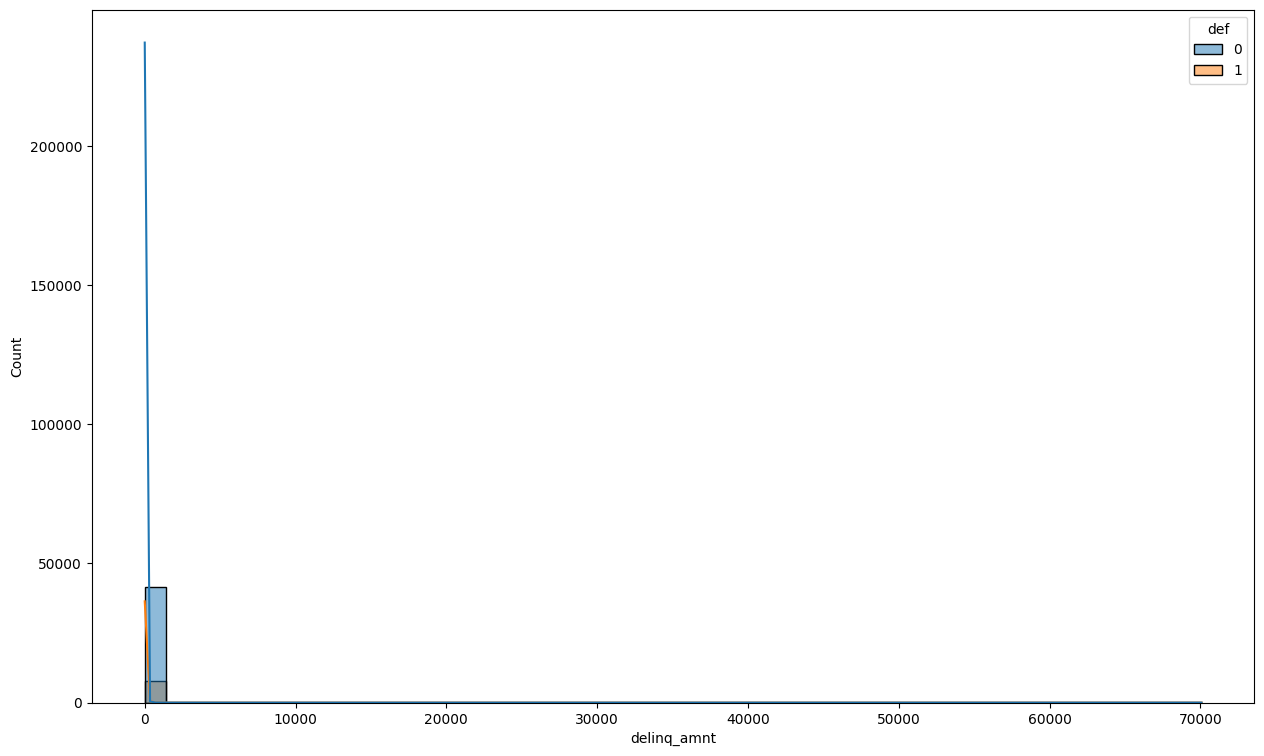

In [ ]:
plt.figure(figsize=(15, 9))
sns.histplot(data = train, x = 'delinq_amnt', hue = 'def', kde=True, bins = 50)
plt.show()

In [ ]:
train[train.delinq_amnt == 0] #тут почти все значения сравнимы с 0

,issue_d,purpose,addr_state,sub_grade,home_ownership,emp_title,installment,dti,funded_amnt,annual_inc,...,delinq_2yrs,chargeoff_within_12_mths,num_accts_ever_120_pd,num_tl_90g_dpd_24m,acc_open_past_24mths,avg_cur_bal,tot_hi_cred_lim,delinq_amnt,def,year_month
1,2013-01-01,debt_consolidation,FL,B4,MORTGAGE,Queen of Pawns,674.94,16.31,20000,95000.0,...,0,0,0.0,0.0,4.0,23735.0,153379.0,0,0,2013-01-01
2,2013-07-01,debt_consolidation,NJ,B5,RENT,tek services,809.24,14.01,24000,90000.0,...,0,0,0.0,0.0,5.0,4070.0,50834.0,0,0,2013-07-01
3,2014-03-01,debt_consolidation,MI,C2,MORTGAGE,Inventory Control,342.56,14.51,10000,43000.0,...,1,1,4.0,1.0,3.0,1127.0,32683.0,0,0,2014-03-01
4,2013-10-01,credit_card,TX,D2,MORTGAGE,Business Analyst,473.58,22.65,13000,62000.0,...,0,0,0.0,0.0,5.0,3443.0,59495.0,0,0,2013-10-01
7,2014-05-01,debt_consolidation,NY,C4,MORTGAGE,Medical Transcritionist,688.05,11.27,29250,61000.0,...,1,0,0.0,0.0,5.0,1394.0,39100.0,0,0,2014-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61163,2013-05-01,credit_card,VA,A2,MORTGAGE,united state postal service,552.67,18.23,18000,79638.0,...,0,0,0.0,0.0,0.0,36093.0,424132.0,0,0,2013-05-01
61164,2013-02-01,debt_consolidation,CA,A5,RENT,Cupertino Union School District,583.47,7.96,18375,133325.0,...,1,0,1.0,1.0,1.0,5278.0,48557.0,0,0,2013-02-01
61165,2013-07-01,debt_consolidation,TX,A5,MORTGAGE,Los Fresnos CISD,341.72,20.97,16500,82000.0,...,0,0,0.0,0.0,3.0,18594.0,333493.0,0,0,2013-07-01
61166,2013-04-01,debt_consolidation,FL,D1,RENT,Publix,245.06,33.65,6800,27000.0,...,0,0,1.0,0.0,5.0,2093.0,36095.0,0,0,2013-04-01


In [ ]:
train[train.delinq_amnt != 0]['def'].mean() #незначительно, этот признак удалим

0.1732283464566929

Давайте ещё добавим месяцы и дни недели как признаки и посмотрим на зависимость таргета от этих признаков

In [ ]:
train['weekday'] = train.issue_d.apply(lambda x: dt.fromisoformat(x).weekday())
train['month'] = train.issue_d.apply(lambda x: dt.fromisoformat(x).month)
test['weekday'] = test.issue_d.apply(lambda x: dt.fromisoformat(x).weekday())
test['month'] = test.issue_d.apply(lambda x: dt.fromisoformat(x).month)

In [ ]:
groupby_weekday = train.groupby('weekday').agg({'def':'mean'}).reset_index()
groupby_month = train.groupby('month').agg({'def':'mean'}).reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x = groupby_weekday['weekday'], y = groupby_weekday['def'], name = 'def'))
fig.show()

В целом это не значимые различия

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = groupby_month['month'], y = groupby_month['def'], name = 'def'))
fig.show()

Тут уже более значимые различия, возможно люди становятся более позитивно настроенными с апреля, в это время берется больше всего кредитов-дефолтов

# Работа с пустыми значениями

In [ ]:
train.isnull().sum()

issue_d                        0
purpose                        0
addr_state                     0
sub_grade                      0
home_ownership                 0
emp_title                   3140
installment                    0
dti                            0
funded_amnt                    0
annual_inc                     0
emp_length                  2260
term                           0
inq_last_6mths                 0
mths_since_recent_inq       5112
delinq_2yrs                    0
chargeoff_within_12_mths       0
num_accts_ever_120_pd          0
num_tl_90g_dpd_24m             0
acc_open_past_24mths           0
avg_cur_bal                    0
tot_hi_cred_lim                0
delinq_amnt                    0
def                            0
year_month                     0
weekday                        0
month                          0
dtype: int64

In [ ]:
train[numeric_data].corrwith(train['mths_since_recent_inq']).sort_values(ascending=False)

mths_since_recent_inq       1.000000
funded_amnt                 0.017546
emp_length                  0.009695
dti                         0.008789
delinq_amnt                -0.000973
installment                -0.003569
chargeoff_within_12_mths   -0.003697
avg_cur_bal                -0.017562
term                       -0.019123
num_tl_90g_dpd_24m         -0.020253
delinq_2yrs                -0.024893
def                        -0.048268
tot_hi_cred_lim            -0.050292
num_accts_ever_120_pd      -0.051785
annual_inc                 -0.054325
acc_open_past_24mths       -0.158241
inq_last_6mths             -0.670815
dtype: float64

In [ ]:
train[train.mths_since_recent_inq.isna()].inq_last_6mths.mean()

0.0

In [ ]:
train[train.mths_since_recent_inq.isna()]['def'].mean()

0.11326291079812206

У тех у кого mths_since_recent_inq пустой просто никогда не было травм

In [ ]:
train.mths_since_recent_inq = train.mths_since_recent_inq.fillna(25.0)

In [ ]:
train.groupby('mths_since_recent_inq').agg({'def':'mean', 'issue_d':'count'})

,def,issue_d
mths_since_recent_inq,,
0.0,0.190895,3866
1.0,0.201592,4648
2.0,0.180185,3674
3.0,0.175276,3349
4.0,0.168329,3208
5.0,0.159445,2885
6.0,0.159202,2657
7.0,0.149494,2669
8.0,0.145798,2380


Удалим все ненужные колонки

In [ ]:
train = train.drop(columns = ['emp_title', 'funded_amnt', 'chargeoff_within_12_mths', 'num_tl_90g_dpd_24m', 'tot_hi_cred_lim', 'weekday', 'delinq_amnt'])

Перекодируем признаки

In [ ]:
def mths_transform(x):
  if x == 25:
    return 'no_inq'
  if x >= 15 and x < 25:
    return '15-24'
  if x >= 6 and x < 15:
    return '6-14'
  else:
    return '1-5'

In [ ]:
train.mths_since_recent_inq = train.mths_since_recent_inq.apply(mths_transform)

In [ ]:
train.month = train.month.apply(lambda x: str(x))

In [ ]:
def avg_cur_bal_transform(x):
  if x >50000:
    return 50000
  return x

In [ ]:
train.avg_cur_bal = train.avg_cur_bal.apply(avg_cur_bal_transform)

In [ ]:
def acc_open_past_24mths_transform(x):
  if x > 8:
    return 8
  return x

In [ ]:
train.acc_open_past_24mths = train.acc_open_past_24mths.apply(acc_open_past_24mths_transform)

In [ ]:
def num_accts_ever_120_pd_transform(x):
  if x > 0:
    return 1
  return 0

In [ ]:
train.num_accts_ever_120_pd = train.num_accts_ever_120_pd.apply(num_accts_ever_120_pd_transform)

In [ ]:
train.num_accts_ever_120_pd

1        0
2        0
3        1
4        0
7        0
        ..
61163    0
61164    1
61165    0
61166    1
61168    0
Name: num_accts_ever_120_pd, Length: 49224, dtype: int64

In [ ]:
def delinq_2yrs_transform(x):
  if x == 0:
    return 0
  return 1

In [ ]:
train.delinq_2yrs = train.delinq_2yrs.apply(delinq_2yrs_transform)

In [ ]:
train.emp_length = train.emp_length.fillna(11) #закодируем пропуски числом 11

In [ ]:
train.groupby('emp_length').agg({'def':'mean'})

,def
emp_length,
0.0,0.162310
1.0,0.161842
2.0,0.152489
3.0,0.149878
4.0,0.158754
5.0,0.172944
6.0,0.159420
7.0,0.151691
8.0,0.166052


Давайте взглянем на изначальный датасет

In [ ]:
data_train[data_train.emp_length.isna()].emp_title.isna() #почти все значения, где emp_length NaN emp_title тоже NaN эти люди безработные

68       True
88       True
108      True
114      True
122      True
         ... 
61033    True
61072    True
61118    True
61140    True
61147    True
Name: emp_title, Length: 2674, dtype: bool

Закодируем безработных - 0, тех кто работает меньше 10 лет - 1, тех кто больше - 2

In [ ]:
def emp_length_transform(x):
  if x == 11:
    return 0
  if x == 10:
    return 2
  return 1

In [ ]:
train.emp_length = train.emp_length.apply(emp_length_transform)

In [ ]:
def annual_inc_transform(x):
  if x > 200000:
    return 200000
  return x

In [ ]:
train.annual_inc = train.annual_inc.apply(annual_inc_transform)

In [ ]:
old_y = y.copy()

In [ ]:
y = train['def']

In [ ]:
train = train.drop(columns = ['year_month', 'issue_d']) # убираем дату

## WOE

In [ ]:
!pip install scorecardpy

In [ ]:
import scorecardpy as sc

In [ ]:
bins = sc.woebin(train , 'def')

[INFO] creating woe binning ...


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-

Binning on 49224 rows and 17 columns in 00:00:26


Отберем те признаки в которых total_iv > 0.01

В будущем можно реализовать, что минимальный IV выбирается на валидации

In [ ]:
total_ivs = dict()
for key in bins.keys():
    total_ivs[key] = bins[key].total_iv[0]
new = dict()
for key, total_iv in total_ivs.items():
    if total_iv >= 0.01:
        new[key] = total_iv
categories = list(new.keys()) #categories - те что прошли filter
non_categories = []
for category in train.columns:
    if not category in categories:
        non_categories.append(category)
categories


['home_ownership',
 'addr_state',
 'mths_since_recent_inq',
 'sub_grade',
 'acc_open_past_24mths',
 'dti',
 'installment',
 'term',
 'inq_last_6mths',
 'avg_cur_bal',
 'purpose',
 'annual_inc']

Проверим монотонность оставшихся признаков(только численные)

In [ ]:
bins['avg_cur_bal']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,avg_cur_bal,"[-inf,9000.0)",26058,0.529376,21470,4588,0.176069,0.125154,0.008650,0.041019,9000.0,False
1,avg_cur_bal,"[9000.0,15000.0)",6608,0.134243,5528,1080,0.163438,0.035501,0.000171,0.041019,15000.0,False
2,avg_cur_bal,"[15000.0,23000.0)",6934,0.140866,5899,1035,0.149264,-0.072015,0.000713,0.041019,23000.0,False
3,avg_cur_bal,"[23000.0,38000.0)",6253,0.127032,5440,813,0.130018,-0.232437,0.006332,0.041019,38000.0,False
4,avg_cur_bal,"[38000.0,inf)",3371,0.068483,3078,293,0.086918,-0.683496,0.025153,0.041019,inf,False


In [ ]:
bins['installment']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,installment,"[-inf,200.0)",6668,0.135462,5807,861,0.129124,-0.240359,0.007201,0.013678,200.0,False
1,installment,"[200.0,320.0)",9896,0.201040,8387,1509,0.152486,-0.046869,0.000435,0.013678,320.0,False
2,installment,"[320.0,340.0)",2546,0.051723,2209,337,0.132364,-0.211846,0.002157,0.013678,340.0,False
3,installment,"[340.0,inf)",30114,0.611775,25012,5102,0.169423,0.078643,0.003886,0.013678,inf,False


In [ ]:
bins['mths_since_recent_inq']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,mths_since_recent_inq,no_inq,5112,0.103852,4533,579,0.113263,-0.389471,0.013751,0.030285,no_inq,False
1,mths_since_recent_inq,15-24,5565,0.113055,4800,765,0.137466,-0.168129,0.003016,0.030285,15-24,False
2,mths_since_recent_inq,6-14,16917,0.343674,14376,2541,0.150204,-0.064636,0.001404,0.030285,6-14,False
3,mths_since_recent_inq,1-5,21630,0.439420,17706,3924,0.181415,0.161574,0.012113,0.030285,1-5,False


In [ ]:
bins['dti']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,dti,"[-inf,9.0)",7327,0.148850,6496,831,0.113416,-0.387946,0.019566,0.047973,9.0,False
1,dti,"[9.0,13.0)",8054,0.163619,6978,1076,0.133598,-0.201146,0.006175,0.047973,13.0,False
2,dti,"[13.0,18.0)",11500,0.233626,9744,1756,0.152696,-0.045247,0.000471,0.047973,18.0,False
3,dti,"[18.0,26.0)",15098,0.306720,12449,2649,0.175454,0.120908,0.004671,0.047973,26.0,False
4,dti,"[26.0,inf)",7245,0.147184,5748,1497,0.206625,0.322977,0.017089,0.047973,inf,False


In [ ]:
bins['inq_last_6mths']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,inq_last_6mths,"[-inf,1.0)",24937,0.506602,21475,3462,0.138830,-0.156677,0.011782,0.02643,1.0,False
1,inq_last_6mths,"[1.0,2.0)",13824,0.280839,11484,2340,0.169271,0.077562,0.001735,0.02643,2.0,False
2,inq_last_6mths,"[2.0,3.0)",6409,0.130201,5225,1184,0.184740,0.183810,0.004679,0.02643,3.0,False
3,inq_last_6mths,"[3.0,inf)",4054,0.082358,3231,823,0.203009,0.300775,0.008234,0.02643,inf,False


In [ ]:
bins['term']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,term,"[-inf,60.0)",36465,0.740797,31893,4572,0.125381,-0.274070,0.050595,0.159402,60.0,False
1,term,"[60.0,inf)",12759,0.259203,9522,3237,0.253703,0.589408,0.108808,0.159402,inf,False


In [ ]:
bins['acc_open_past_24mths']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,acc_open_past_24mths,"[-inf,2.0)",7862,0.159719,6917,945,0.120198,-0.322186,0.014821,0.04211,2.0,False
1,acc_open_past_24mths,"[2.0,4.0)",15648,0.317894,13454,2194,0.140210,-0.145184,0.006374,0.04211,4.0,False
2,acc_open_past_24mths,"[4.0,6.0)",13349,0.271189,11128,2221,0.166380,0.056859,0.000894,0.04211,6.0,False
3,acc_open_past_24mths,"[6.0,inf)",12365,0.251199,9916,2449,0.198059,0.269896,0.020022,0.04211,inf,False


In [ ]:
bins['annual_inc']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,annual_inc,"[-inf,65000.0)",24625,0.500264,20179,4446,0.180548,0.155729,0.012786,0.034069,65000.0,False
1,annual_inc,"[65000.0,80000.0)",8082,0.164188,6841,1241,0.153551,-0.038650,0.000242,0.034069,80000.0,False
2,annual_inc,"[80000.0,130000.0)",12583,0.255627,10899,1684,0.133831,-0.199133,0.009462,0.034069,130000.0,False
3,annual_inc,"[130000.0,inf)",3934,0.079920,3496,438,0.111337,-0.408790,0.011579,0.034069,inf,False


Тут неравномерное различие бинов, сгруппируем по признакам, как это автоматически сделала библиотека

In [ ]:
bins['sub_grade'].sort_values(by = 'woe')

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,sub_grade,"A1%,%A2%,%A3%,%A4",4670,0.094872,4485,185,0.039615,-1.519772,0.128578,0.369345,"A1%,%A2%,%A3%,%A4",False
1,sub_grade,"A5%,%B1%,%B2",7898,0.160450,7255,643,0.081413,-0.754935,0.070086,0.369345,"A5%,%B1%,%B2",False
2,sub_grade,"B3%,%B5%,%B4%,%C1",12544,0.254835,11042,1502,0.119739,-0.326542,0.024254,0.369345,"B3%,%B5%,%B4%,%C1",False
3,sub_grade,"C2%,%C3%,%C4%,%C5%,%D1%,%D3%,%D2%,%D4",17715,0.359885,14159,3556,0.200734,0.286652,0.032532,0.369345,"C2%,%C3%,%C4%,%C5%,%D1%,%D3%,%D2%,%D4",False
4,sub_grade,"E1%,%D5%,%G4%,%E2%,%E3%,%F1%,%E4%,%E5%,%F4%,%F...",6397,0.129957,4474,1923,0.300610,0.823970,0.113894,0.369345,"E1%,%D5%,%G4%,%E2%,%E3%,%F1%,%E4%,%E5%,%F4%,%F...",False


sub_grade оценивает вероятность дефолта, и чем выше рейтинг, тем больше вероятность дефолта, woe выстраивается не ровно по этому рейтингу(возможно потому, что большую вероятность дефолта выдают крайне редко, из-за это большой доверительный интервал для woe, поэтому F1, F2... сгруппируем по F, аналогично с G)

In [ ]:
def sub_grade_def(s):
    if s[0] == 'F':
        return 'F'
    if s[0] == 'G':
        return 'G'
    return s

In [ ]:
train.sub_grade = train.sub_grade.apply(sub_grade_def)

In [ ]:
breaks_list = {}
breaks_list['sub_grade'] = list(train.sub_grade.unique())

In [ ]:
bins = sc.woebin(train, 'def', breaks_list=breaks_list)

[INFO] creating woe binning ...


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-

Binning on 49224 rows and 17 columns in 00:00:24


In [ ]:
bins['purpose']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,purpose,"vacation%,%car%,%credit_card",12505,0.254043,10841,1664,0.133067,-0.205745,0.010015,0.017517,"vacation%,%car%,%credit_card",False
1,purpose,"home_improvement%,%major_purchase%,%renewable_...",3594,0.073013,3079,515,0.143294,-0.119827,0.001006,0.017517,"home_improvement%,%major_purchase%,%renewable_...",False
2,purpose,"wedding%,%house%,%debt_consolidation",29800,0.605396,24808,4992,0.167517,0.065037,0.002618,0.017517,"wedding%,%house%,%debt_consolidation",False
3,purpose,"other%,%medical%,%moving%,%small_business",3325,0.067548,2687,638,0.191880,0.230524,0.003878,0.017517,"other%,%medical%,%moving%,%small_business",False


Закодируем признаки значениями badprob в бакетах

In [ ]:
def purpose_transform(s):
    if s in ['car', 'vacation', 'credit_card']:
        return 0.133067
    if s in ['home_improvement', 'major_purchase', 'renewable_energy', 'educational']:
        return 0.143294
    if s in ['house', 'debt_consolidation', 'wedding']:
        return 0.167517
    if s in ['other', 'medical', 'moving', 'small_business']:
        return 0.191880
    return s

In [ ]:
bins['home_ownership']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,home_ownership,"NONE%,%MORTGAGE",26075,0.529721,22329,3746,0.143663,-0.116831,6.945580e-03,0.01578,"NONE%,%MORTGAGE",False
1,home_ownership,OWN,4235,0.086035,3565,670,0.158205,-0.003275,9.219764e-07,0.01578,OWN,False
2,home_ownership,"RENT%,%OTHER",18914,0.384243,15521,3393,0.179391,0.147887,8.833433e-03,0.01578,"RENT%,%OTHER",False


In [ ]:
def ownership_transform(s):
    if s in ['NONE','MORTGAGE']:
        return 0.143663
    if s == 'OWN':
        return 0.158205
    if s in ['RENT', 'OTHER']:
        return 0.179391
    return s

In [ ]:
bins['addr_state']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,addr_state,"DC%,%RI%,%MT%,%WV%,%AK%,%VT%,%CO%,%SD%,%UT",2627,0.053368,2344,283,0.107727,-0.445801,0.009075,0.019032,"DC%,%RI%,%MT%,%WV%,%AK%,%VT%,%CO%,%SD%,%UT",False
1,addr_state,"SC%,%TX%,%WA%,%NH%,%KS%,%MN%,%OR%,%AZ%,%CA%,%C...",19139,0.388814,16343,2796,0.146089,-0.097244,0.003556,0.019032,"SC%,%TX%,%WA%,%NH%,%KS%,%MN%,%OR%,%AZ%,%CA%,%C...",False
2,addr_state,"DE%,%WI%,%LA%,%MI%,%WY%,%OK%,%NV%,%IN%,%VA%,%M...",11050,0.224484,9217,1833,0.165882,0.053271,0.000649,0.019032,"DE%,%WI%,%LA%,%MI%,%WY%,%OK%,%NV%,%IN%,%VA%,%M...",False
3,addr_state,"NC%,%TN%,%NY%,%FL%,%KY%,%MO%,%MD%,%PA%,%NJ%,%A...",16408,0.333333,13511,2897,0.176560,0.128538,0.005752,0.019032,"NC%,%TN%,%NY%,%FL%,%KY%,%MO%,%MD%,%PA%,%NJ%,%A...",False


In [ ]:
def addr_transform(s):
    if s in ['MT', 'DC', 'AK', 'RI', 'WV', 'CO', 'SD', 'VT', 'UT']:
        return 0.107727
    if s in ['SC', 'TX', 'WA', 'NH', 'KS', 'MN', 'OR', 'AZ', 'CA', 'CT', 'GA', 'NM']:
        return 0.146089
    if s in ['DE', 'WI', 'LA', 'MI', 'WY', 'OK', 'NV', 'IN', 'VA', 'MA', 'IL', 'HI', 'OH']:
        return 0.165882
    return 0.176560

In [ ]:
bins['sub_grade'].sort_values('woe')

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
18,sub_grade,A1,882,0.017918,861,21,0.023810,-2.045206,0.037019,0.392904,A1,False
8,sub_grade,A2,937,0.019035,903,34,0.036286,-1.610996,0.028111,0.392904,A2,False
22,sub_grade,A3,1179,0.023952,1135,44,0.037320,-1.581832,0.034438,0.392904,A3,False
9,sub_grade,A4,1672,0.033967,1586,86,0.051435,-1.246257,0.034001,0.392904,A4,False
19,sub_grade,A5,2145,0.043576,1989,156,0.072727,-0.877165,0.024604,0.392904,A5,False
15,sub_grade,B1,2645,0.053734,2429,216,0.081664,-0.751590,0.023292,0.392904,B1,False
6,sub_grade,B2,3108,0.063140,2837,271,0.087194,-0.680017,0.022983,0.392904,B2,False
16,sub_grade,B3,3697,0.075106,3316,381,0.103057,-0.495349,0.015493,0.392904,B3,False
1,sub_grade,B5,2471,0.050199,2187,284,0.114933,-0.372946,0.006131,0.392904,B5,False
0,sub_grade,B4,3532,0.071754,3102,430,0.121744,-0.307651,0.006102,0.392904,B4,False


In [ ]:
sub_grade_bins = bins['sub_grade'][['bin', 'badprob']]
sub_grade_dict = dict()
for bin in sub_grade_bins['bin']:
    sub_grade_dict[bin] = float(sub_grade_bins[sub_grade_bins['bin'] == bin]['badprob'])

<ipython-input-334-0bf67b4cedbe>:4: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



In [ ]:
def sub_grade_transform(s):
    return sub_grade_dict[s]

In [ ]:
bins['mths_since_recent_inq']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,mths_since_recent_inq,no_inq,5112,0.103852,4533,579,0.113263,-0.389471,0.013751,0.030285,no_inq,False
1,mths_since_recent_inq,15-24,5565,0.113055,4800,765,0.137466,-0.168129,0.003016,0.030285,15-24,False
2,mths_since_recent_inq,6-14,16917,0.343674,14376,2541,0.150204,-0.064636,0.001404,0.030285,6-14,False
3,mths_since_recent_inq,1-5,21630,0.439420,17706,3924,0.181415,0.161574,0.012113,0.030285,1-5,False


In [ ]:
def mths_since_recent_inq_transform(x):
  if x == 'no_inq':
    return 0.113263
  if x == '15-24':
    return 0.137466
  if x == '6-14':
    return 	0.150204
  if x == '1-5':
    return 0.181415

In [ ]:
train_after_woe = train[categories].copy()

In [ ]:
train_after_woe.purpose = train_after_woe.purpose.apply(purpose_transform)
train_after_woe.sub_grade = train_after_woe.sub_grade.apply(sub_grade_transform)
train_after_woe.home_ownership = train_after_woe.home_ownership.apply(ownership_transform)
train_after_woe.addr_state = train_after_woe.addr_state.apply(addr_transform)
train_after_woe.mths_since_recent_inq = train.mths_since_recent_inq.apply(mths_since_recent_inq_transform)
train_after_woe

,home_ownership,addr_state,mths_since_recent_inq,sub_grade,acc_open_past_24mths,dti,installment,term,inq_last_6mths,avg_cur_bal,purpose,annual_inc
1,0.143663,0.176560,0.181415,0.121744,4.0,16.31,674.94,36,1,23735.0,0.167517,95000.0
2,0.179391,0.176560,0.137466,0.114933,5.0,14.01,809.24,36,0,4070.0,0.167517,90000.0
3,0.143663,0.165882,0.181415,0.169214,3.0,14.51,342.56,36,1,1127.0,0.167517,43000.0
4,0.143663,0.146089,0.181415,0.223854,5.0,22.65,473.58,36,3,3443.0,0.133067,62000.0
7,0.143663,0.176560,0.150204,0.193987,5.0,11.27,688.05,60,0,1394.0,0.167517,61000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
61163,0.143663,0.165882,0.113263,0.036286,0.0,18.23,552.67,36,0,36093.0,0.133067,79638.0
61164,0.179391,0.146089,0.113263,0.072727,1.0,7.96,583.47,36,0,5278.0,0.167517,133325.0
61165,0.143663,0.146089,0.181415,0.072727,3.0,20.97,341.72,60,2,18594.0,0.167517,82000.0
61166,0.179391,0.176560,0.181415,0.213748,5.0,33.65,245.06,36,1,2093.0,0.167517,27000.0


## Подготовка признаков к кросс-валидации

Стандартизируем переменные

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(train_after_woe)
train_after_woe_scaled = scaler.transform(train_after_woe)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(class_weight='balanced')

param_grid = {
    'C': [1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')

grid_search.fit(train_after_woe_scaled , y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


120 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='roc_auc')

In [ ]:
grid_search.best_estimator_

LogisticRegression(C=1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [ ]:
grid_search.best_score_

0.6925734921888752

Выделим 20% выборки под валидацию и посмотрим, какие значения функционала ошибки показывает наша модель

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled, valid_scaled, y_train, y_valid = train_test_split(train_after_woe_scaled, y, test_size=0.2)

In [ ]:
first_model = LogisticRegression(C = 1, class_weight='balanced', penalty='l1', solver = 'saga')

In [ ]:
first_model.fit(train_scaled, y_train)
predict_valid = first_model.predict(valid_scaled)
predict_proba = first_model.predict_proba(valid_scaled)

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, accuracy_score, recall_score
print(roc_auc_score(y_valid, predict_proba[:,1]))
print(f1_score(predict_valid, y_valid))
print(precision_score(predict_valid, y_valid))
print(accuracy_score(predict_valid, y_valid))
print(recall_score(predict_valid, y_valid))

0.6905094600836376
0.35554748501906663
0.630392788151964
0.6395124428643981
0.24759736975214972


# Тестовая выборка

In [ ]:
test_after_woe = test[categories]

In [ ]:
test_after_woe.isna().sum()

home_ownership              0
addr_state                  0
mths_since_recent_inq    5989
sub_grade                   0
acc_open_past_24mths        0
dti                         0
installment                 0
term                        0
inq_last_6mths              0
avg_cur_bal                 0
purpose                     0
annual_inc                  0
dtype: int64

In [ ]:
test_after_woe.mths_since_recent_inq = test_after_woe.mths_since_recent_inq.fillna(25)

<ipython-input-351-69d28ac73c9d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
test_after_woe.mths_since_recent_inq = test_after_woe.mths_since_recent_inq.apply(mths_transform)

<ipython-input-352-4953e028b1ec>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
test_after_woe.avg_cur_bal = test_after_woe.avg_cur_bal.apply(avg_cur_bal_transform)

<ipython-input-353-6ba103547f69>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
test_after_woe.acc_open_past_24mths = test_after_woe.acc_open_past_24mths.apply(acc_open_past_24mths_transform)

<ipython-input-354-42b2cb2e1852>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
test_after_woe.annual_inc = test_after_woe.annual_inc.apply(annual_inc_transform)

<ipython-input-355-fb1166a00376>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
test_after_woe.sub_grade = test_after_woe.sub_grade.apply(sub_grade_def)

<ipython-input-356-98456c1d85e8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
test_after_woe.purpose = test_after_woe.purpose.apply(purpose_transform)
test_after_woe.sub_grade = test_after_woe.sub_grade.apply(sub_grade_transform)
test_after_woe.home_ownership = test_after_woe.home_ownership.apply(ownership_transform)
test_after_woe.addr_state = test_after_woe.addr_state.apply(addr_transform)
test_after_woe.mths_since_recent_inq = test_after_woe.mths_since_recent_inq.apply(mths_since_recent_inq_transform)
test_after_woe

<ipython-input-357-81df4f8d70e7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-357-81df4f8d70e7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-357-81df4f8d70e7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-357-81d

,home_ownership,addr_state,mths_since_recent_inq,sub_grade,acc_open_past_24mths,dti,installment,term,inq_last_6mths,avg_cur_bal,purpose,annual_inc
0,0.143663,0.146089,0.181415,0.202966,8,17.22,689.89,36,1,47255,0.167517,200000.0
1,0.143663,0.165882,0.113263,0.213748,2,25.10,578.68,60,0,17604,0.167517,84000.0
2,0.158205,0.146089,0.181415,0.222001,8,17.97,534.72,36,1,3697,0.167517,59028.0
3,0.143663,0.176560,0.181415,0.169214,3,15.82,203.18,36,2,5875,0.167517,46280.0
4,0.158205,0.146089,0.113263,0.114933,2,14.37,1162.34,36,0,50000,0.133067,150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60328,0.158205,0.107727,0.181415,0.278302,8,14.60,92.30,36,0,18053,0.191880,94500.0
60329,0.179391,0.165882,0.150204,0.114933,2,13.60,1070.37,36,0,4840,0.133067,110000.0
60330,0.158205,0.165882,0.150204,0.181818,6,18.32,273.35,36,0,23024,0.167517,52000.0
60331,0.143663,0.146089,0.181415,0.103057,4,17.74,318.64,60,0,22523,0.167517,52000.0


Результаты для второй модели

In [ ]:
y_test = test['def']

In [ ]:
scaler = StandardScaler()
scaler.fit(train_after_woe)
test_after_woe_scaled = scaler.transform(test_after_woe)
train_after_woe_scaled = scaler.transform(train_after_woe)
log_reg = LogisticRegression(penalty='l1', solver='saga', C = 1, class_weight='balanced')
log_reg.fit(train_after_woe_scaled, y)
predict_test = log_reg.predict(test_after_woe_scaled)
predict_proba = log_reg.predict_proba(test_after_woe_scaled)
print(roc_auc_score(y_test, predict_proba[:,1]))
print(f1_score(y_test, predict_test))
print(precision_score(y_test, predict_test))
print(accuracy_score(y_test, predict_test))
print(recall_score(y_test, predict_test))

0.6827401296838229
0.3769713997932515
0.26274756133609223
0.610412212222167
0.6668854918878364


# Бустинг

Попробуем ещё градиентный бустинг

In [ ]:
!pip install optuna

In [ ]:
!pip install lightgbm

In [ ]:
import optuna
import lightgbm

In [ ]:
train_scaled, valid_scaled, y_train, y_valid = train_test_split(train_after_woe_scaled, y, test_size=0.2)

In [ ]:
def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0, 1, log=False),
        'num_leaves': trial.suggest_int('num_leaves', 20, 1000),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'class_weight': 'balanced'
    }

    clf = lightgbm.LGBMClassifier(**params)
    clf.fit(train_scaled, y_train)
    preds = clf.predict_proba(valid_scaled)[:, 1]
    auc_valid = roc_auc_score(y_valid, preds)

    return auc_valid

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15)

[I 2024-04-15 18:56:13,848] A new study created in memory with name: no-name-6dd3db7a-10e0-4c87-9ef6-93a9a223d676


[LightGBM] [Info] Number of positive: 6327, number of negative: 33052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 39379, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-04-15 18:56:18,467] Trial 0 finished with value: 0.5952870130513509 and parameters: {'learning_rate': 0.9210440422431667, 'num_leaves': 544, 'n_estimators': 342, 'max_depth': 6}. Best is trial 0 with value: 0.5952870130513509.


[LightGBM] [Info] Number of positive: 6327, number of negative: 33052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 39379, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-04-15 18:56:29,714] Trial 1 finished with value: 0.6097290407283673 and parameters: {'learning_rate': 0.9043467947438905, 'num_leaves': 863, 'n_estimators': 809, 'max_depth': 6}. Best is trial 1 with value: 0.6097290407283673.


[LightGBM] [Info] Number of positive: 6327, number of negative: 33052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 39379, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-04-15 18:56:47,700] Trial 2 finished with value: 0.6219853273762409 and parameters: {'learning_rate': 0.49221150592672, 'num_leaves': 354, 'n_estimators': 560, 'max_depth': 9}. Best is trial 2 with value: 0.6219853273762409.


[LightGBM] [Info] Number of positive: 6327, number of negative: 33052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 39379, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-04-15 18:56:54,947] Trial 3 finished with value: 0.6198142709121519 and parameters: {'learning_rate': 0.5337513935962526, 'num_leaves': 840, 'n_estimators': 331, 'max_depth': 8}. Best is trial 2 with value: 0.6219853273762409.


[LightGBM] [Info] Number of positive: 6327, number of negative: 33052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 39379, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-04-15 18:56:56,910] Trial 4 finished with value: 0.609567752566047 and parameters: {'learning_rate': 0.9263346135894739, 'num_leaves': 298, 'n_estimators': 80, 'max_depth': 7}. Best is trial 2 with value: 0.6219853273762409.


[LightGBM] [Info] Number of positive: 6327, number of negative: 33052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 39379, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-04-15 18:57:08,277] Trial 5 finished with value: 0.6169114067280803 and parameters: {'learning_rate': 0.4940822354778406, 'num_leaves': 72, 'n_estimators': 812, 'max_depth': 7}. Best is trial 2 with value: 0.6219853273762409.


[LightGBM] [Info] Number of positive: 6327, number of negative: 33052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 39379, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-04-15 18:57:17,833] Trial 6 finished with value: 0.6162305108792455 and parameters: {'learning_rate': 0.6682545282266025, 'num_leaves': 616, 'n_estimators': 632, 'max_depth': 10}. Best is trial 2 with value: 0.6219853273762409.


[LightGBM] [Info] Number of positive: 6327, number of negative: 33052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 39379, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-04-15 18:57:20,834] Trial 7 finished with value: 0.6235154267810643 and parameters: {'learning_rate': 0.7944631564199645, 'num_leaves': 235, 'n_estimators': 310, 'max_depth': 8}. Best is trial 7 with value: 0.6235154267810643.


[LightGBM] [Info] Number of positive: 6327, number of negative: 33052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 39379, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-04-15 18:57:23,909] Trial 8 finished with value: 0.6262799978634765 and parameters: {'learning_rate': 0.30976495557252703, 'num_leaves': 715, 'n_estimators': 445, 'max_depth': 6}. Best is trial 8 with value: 0.6262799978634765.


[LightGBM] [Info] Number of positive: 6327, number of negative: 33052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 39379, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-04-15 18:57:28,716] Trial 9 finished with value: 0.6222262510644293 and parameters: {'learning_rate': 0.29565868468467593, 'num_leaves': 798, 'n_estimators': 632, 'max_depth': 6}. Best is trial 8 with value: 0.6262799978634765.


[LightGBM] [Info] Number of positive: 6327, number of negative: 33052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 39379, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2024-04-15 18:57:29,184] Trial 10 finished with value: 0.6820987729028787 and parameters: {'learning_rate': 0.01770067846711998, 'num_leaves': 997, 'n_estimators': 87, 'max_depth': 3}. Best is trial 10 with value: 0.6820987729028787.


[LightGBM] [Info] Number of positive: 6327, number of negative: 33052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 39379, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2024-04-15 18:57:29,656] Trial 11 finished with value: 0.6872052900580814 and parameters: {'learning_rate': 0.02525871947701641, 'num_leaves': 943, 'n_estimators': 86, 'max_depth': 3}. Best is trial 11 with value: 0.6872052900580814.


[LightGBM] [Info] Number of positive: 6327, number of negative: 33052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 39379, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2024-04-15 18:57:30,104] Trial 12 finished with value: 0.6920146868242175 and parameters: {'learning_rate': 0.03797194522982939, 'num_leaves': 978, 'n_estimators': 82, 'max_depth': 3}. Best is trial 12 with value: 0.6920146868242175.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6327, number of negative: 33052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 39379, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2024-04-15 18:57:30,961] Trial 13 finished with value: 0.6779205703807805 and parameters: {'learning_rate': 0.004987009899668937, 'num_leaves': 992, 'n_estimators': 188, 'max_depth': 3}. Best is trial 12 with value: 0.6920146868242175.


[LightGBM] [Info] Number of positive: 6327, number of negative: 33052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 39379, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2024-04-15 18:57:31,920] Trial 14 finished with value: 0.6822610292782795 and parameters: {'learning_rate': 0.1607749487501824, 'num_leaves': 696, 'n_estimators': 202, 'max_depth': 4}. Best is trial 12 with value: 0.6920146868242175.


In [ ]:
study.best_value

0.6920146868242175

In [ ]:
study.best_params

{'learning_rate': 0.03797194522982939,
 'num_leaves': 978,
 'n_estimators': 82,
 'max_depth': 3}

In [ ]:
total_clf = lightgbm.LGBMClassifier(learning_rate = 0.04332619624559331, num_leaves = 559, n_estimators = 962, max_depth = 3, class_weight = 'balanced' )
total_clf.fit(train_after_woe_scaled, y)
predict_test = total_clf.predict(test_after_woe_scaled)
predict_proba = total_clf.predict_proba(test_after_woe_scaled)[:,1]

[LightGBM] [Info] Number of positive: 7809, number of negative: 41415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1088
[LightGBM] [Info] Number of data points in the train set: 49224, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
print(roc_auc_score(y_test, predict_proba))
print(f1_score(y_test, predict_test))
print(precision_score(y_test, predict_test))
print(accuracy_score(y_test, predict_test))
print(recall_score(y_test, predict_test))

0.6773546672221223
0.3720656649377039
0.26021915554059616
0.610727131089122
0.6525368095282753


Примерно одинаковые предсказания на тестовой выборке

# Валидация

## Коэффициент Джини (нормализованный)

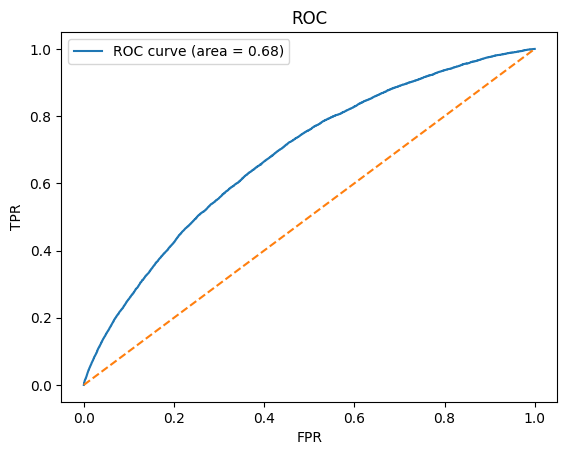

Gini coefficient: 0.36548025936764583


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


probs = log_reg.predict_proba(test_after_woe_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
gini = 2 * roc_auc - 1
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc.round(2)})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()
plt.show()
print("Gini coefficient:", gini)


**Зеленый** тест

## Коэффициенты Джини по факторам

Строим модель на одном признаке и оцениваем коэффициент Джини

In [ ]:
def gini_impurity(feature):
    train_feature = train_after_woe[feature]
    test_feature = test_after_woe[feature]
    scaler = StandardScaler()
    scaler.fit(train_feature)
    train_feature_scaled = scaler.transform(train_feature)
    test_feature_scaled = scaler.transform(test_feature)
    log_reg.fit(train_feature_scaled, y)
    probas = log_reg.predict_proba(test_feature_scaled)[:,1]
    roc_auc_feature = roc_auc_score(y_test, probas)
    return 2*roc_auc_feature - 1
print(gini_impurity(['purpose']))

0.06065115573532753


In [ ]:
gini_s = dict()
gini_features = train_after_woe.columns
for column in gini_features:
    print(column)
    gini_s[column] = gini_impurity([column])

home_ownership


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



addr_state
mths_since_recent_inq
sub_grade
acc_open_past_24mths
dti
installment
term


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



inq_last_6mths
avg_cur_bal
purpose
annual_inc


In [ ]:
gini_s


{'home_ownership': 0.09270921553131295,
 'addr_state': 0.03088058575702135,
 'mths_since_recent_inq': 0.08999772690888075,
 'sub_grade': 0.3441075309742416,
 'acc_open_past_24mths': 0.1603516548807613,
 'dti': 0.15468562549401121,
 'installment': 0.04270647494508495,
 'term': 0.1250022010598657,
 'inq_last_6mths': 0.09033525044719304,
 'avg_cur_bal': 0.11606923617662179,
 'purpose': 0.06065115573532753,
 'annual_inc': 0.11486973737820305}

Тут у нас 2 желтых фактора из 12 общих, < 10%, так что этот тест **зеленый**

## Анализ факторов в формирование Джини модели

In [ ]:
sorted_gini_s = dict(sorted(gini_s.items(), key=lambda x: x[1], reverse = True))
sorted_columns = list(sorted_gini_s.keys())
gini_columns = []
gini_dynamics = dict()
for column in sorted_columns:
  gini_columns.append(column)
  gini_coef = gini_impurity(gini_columns)
  gini_dynamics[column] = gini_coef


In [ ]:
gini_dynamics

{'sub_grade': 0.3441075309742416,
 'acc_open_past_24mths': 0.3546125236841686,
 'dti': 0.3603388610727831,
 'term': 0.35319958957856734,
 'avg_cur_bal': 0.3624709012144507,
 'annual_inc': 0.3617595571831953,
 'home_ownership': 0.3642753756901902,
 'inq_last_6mths': 0.36485332879080157,
 'mths_since_recent_inq': 0.3645969088566363,
 'purpose': 0.3645472101238143,
 'installment': 0.36674322874590404,
 'addr_state': 0.36547907741313024}

## Динамика Джини

In [ ]:
test_with_date = pd.merge(test_after_woe.reset_index(), test[['issue_d']].reset_index(), on = 'index').drop(columns = 'index')

In [ ]:
test_with_date['year_month'] = test_with_date.issue_d.apply(lambda x: datetime.date(dt.fromisoformat(x).year, dt.fromisoformat(x).month, 1))

In [ ]:
gini_date = dict()
for date in test_with_date.year_month.unique():
    columns = train_after_woe.columns
    test_after_woe = test_with_date[test_with_date.year_month == date][columns]
    y_test = test[test.year_month == date]['def']
    scaler = StandardScaler()
    scaler.fit(train_after_woe)
    train_after_woe_scaled = scaler.transform(train_after_woe)
    test_after_woe_scaled = scaler.transform(test_after_woe)
    log_reg.fit(train_after_woe_scaled, y)
    predict_test = log_reg.predict(test_after_woe_scaled)
    predict_proba = log_reg.predict_proba(test_after_woe_scaled)
    auc = roc_auc_score(y_test, predict_proba[:,1])
    gini_date[date] = 2*auc - 1


In [ ]:
gini_date = dict(sorted(gini_date.items()))

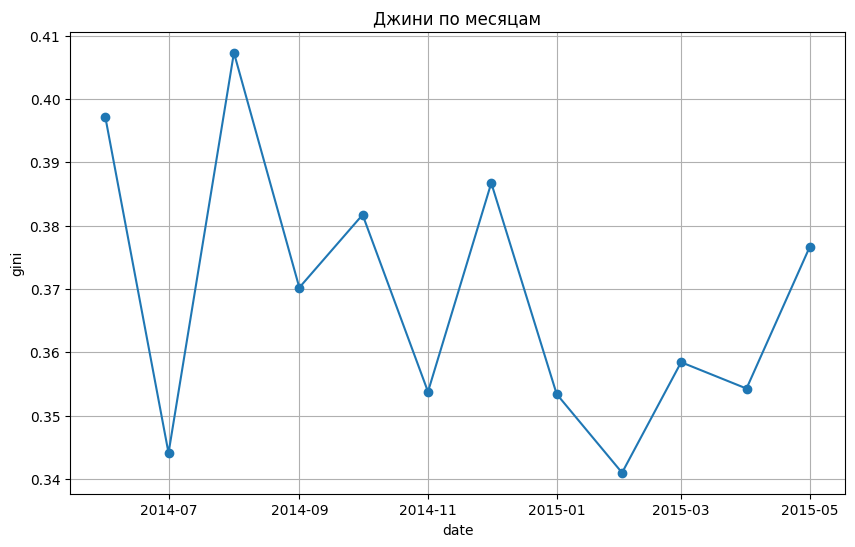

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(gini_date.keys(), gini_date.values(), marker='o')
plt.title('Джини по месяцам')
plt.xlabel('date')
plt.ylabel('gini')
plt.grid(True)
plt.show()

## Анализ корректности дискретного преобразования

In [ ]:
train_after_woe.columns

Index(['home_ownership', 'addr_state', 'mths_since_recent_inq', 'sub_grade',
       'acc_open_past_24mths', 'dti', 'installment', 'term', 'inq_last_6mths',
       'avg_cur_bal', 'purpose', 'annual_inc'],
      dtype='object')

In [ ]:
test_woe = test[categories + ['def']]

In [ ]:
test_woe.mths_since_recent_inq = test_woe.mths_since_recent_inq.fillna(25)
test_woe.mths_since_recent_inq = test_woe.mths_since_recent_inq.apply(mths_transform)
test_woe.avg_cur_bal = test_woe.avg_cur_bal.apply(avg_cur_bal_transform)
test_woe.acc_open_past_24mths = test_woe.acc_open_past_24mths.apply(acc_open_past_24mths_transform)
test_woe.annual_inc = test_woe.annual_inc.apply(annual_inc_transform)
test_woe.sub_grade = test_woe.sub_grade.apply(sub_grade_def)


<ipython-input-397-f0fe21155cae>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-397-f0fe21155cae>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-397-f0fe21155cae>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-397-f0f

In [ ]:
breaks_list = dict()
for column in train_after_woe.columns:
  breaks_list[column] = list(bins[column]['breaks'])

In [ ]:
valid_woe_bins = sc.woebin(test_woe, 'def', breaks_list = breaks_list)

[INFO] creating woe binning ...


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-

In [ ]:
valid_woe_bins['addr_state']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,addr_state,"DC%,%RI%,%MT%,%WV%,%AK%,%VT%,%CO%,%SD%,%UT",3071,0.050901,2578,493,0.160534,-0.115639,0.000655,0.003343,"DC%,%RI%,%MT%,%WV%,%AK%,%VT%,%CO%,%SD%,%UT",False
1,addr_state,"SC%,%TX%,%WA%,%NH%,%KS%,%MN%,%OR%,%AZ%,%CA%,%C...",22505,0.373013,18677,3828,0.170096,-0.046329,0.000789,0.003343,"SC%,%TX%,%WA%,%NH%,%KS%,%MN%,%OR%,%AZ%,%CA%,%C...",False
2,addr_state,"DE%,%WI%,%LA%,%MI%,%WY%,%OK%,%NV%,%IN%,%VA%,%M...",13952,0.231250,11512,2440,0.174885,-0.012771,0.000038,0.003343,"DE%,%WI%,%LA%,%MI%,%WY%,%OK%,%NV%,%IN%,%VA%,%M...",False
3,addr_state,"NC%,%TN%,%NY%,%FL%,%KY%,%MO%,%MD%,%PA%,%NJ%,%A...",20805,0.344836,16903,3902,0.187551,0.072619,0.001861,0.003343,"NC%,%TN%,%NY%,%FL%,%KY%,%MO%,%MD%,%PA%,%NJ%,%A...",False


home_ownership
3
3


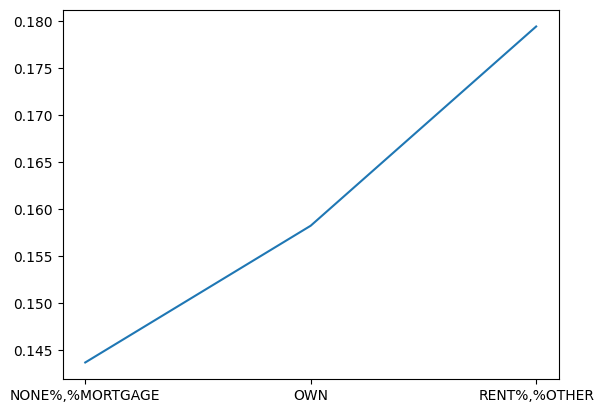

addr_state
4
4


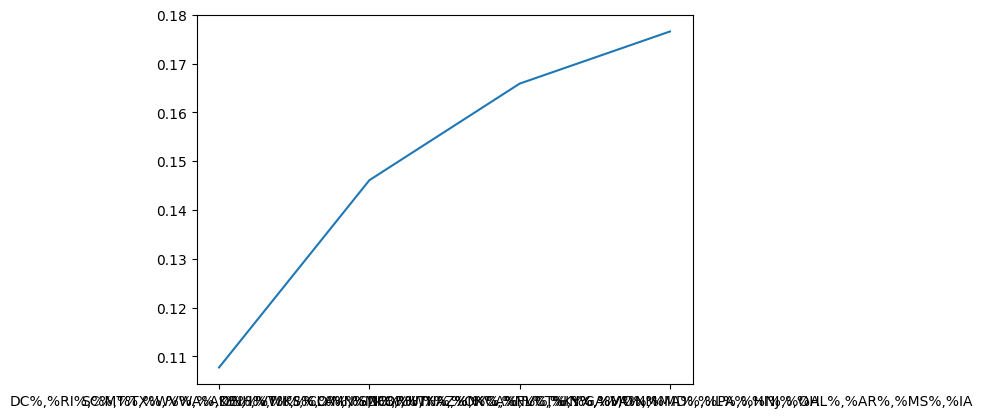

mths_since_recent_inq
4
4


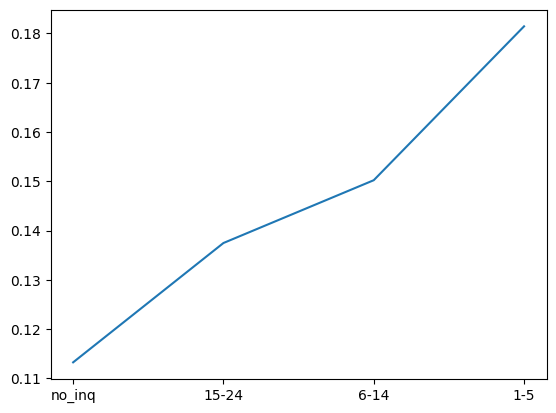

installment
4
4


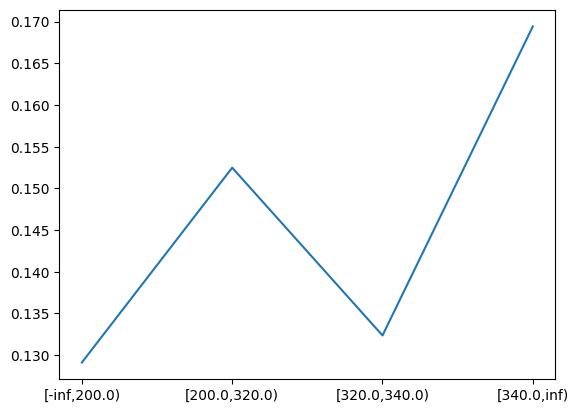

term
2
2


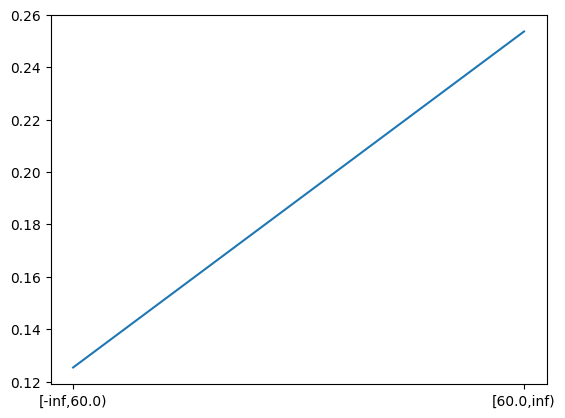

sub_grade
27
27


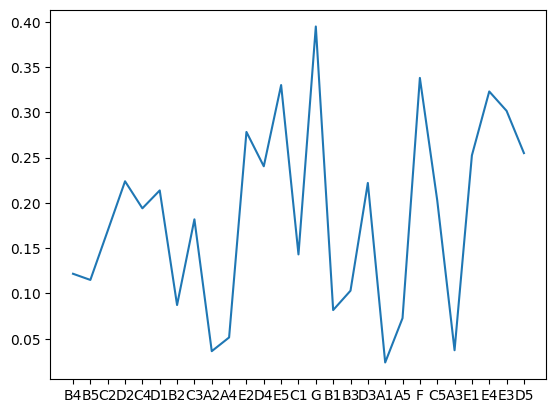

dti
5
5


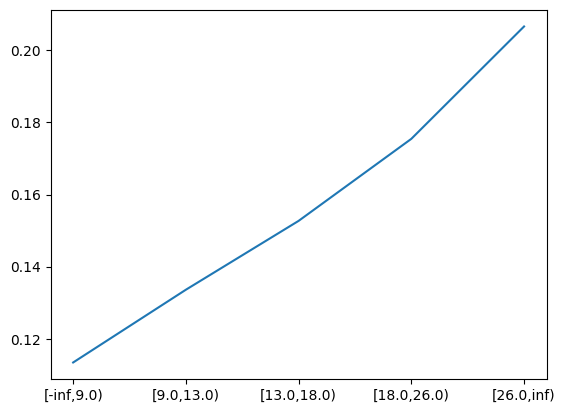

inq_last_6mths
4
4


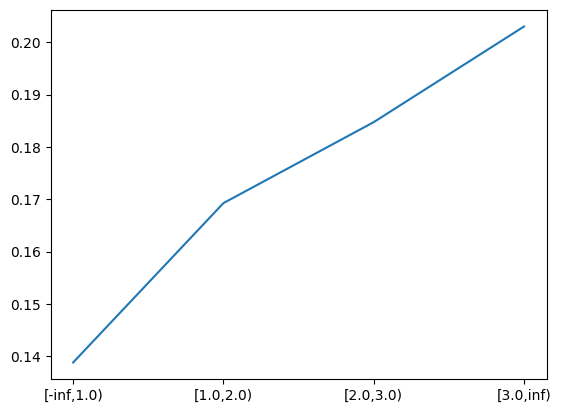

avg_cur_bal
5
5


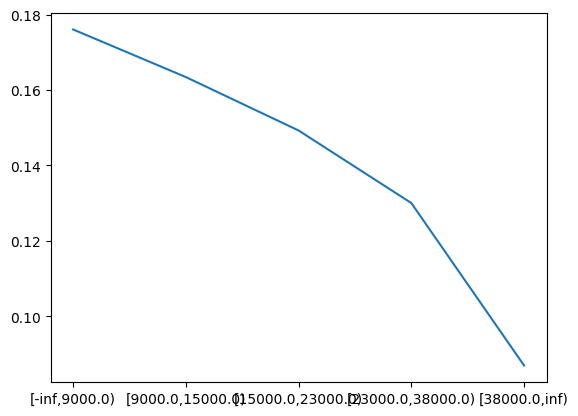

purpose
4
4


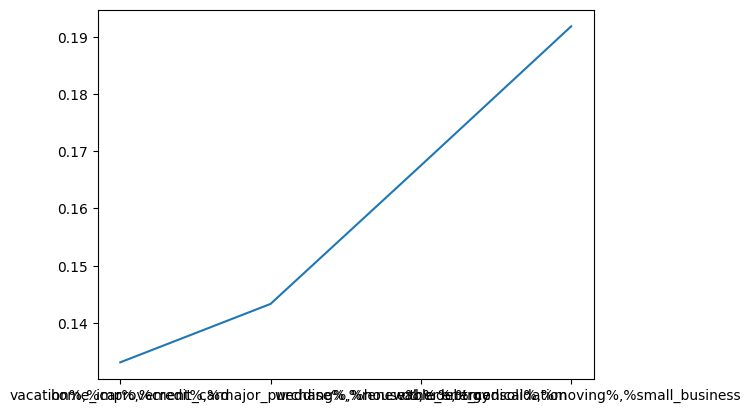

annual_inc
4
4


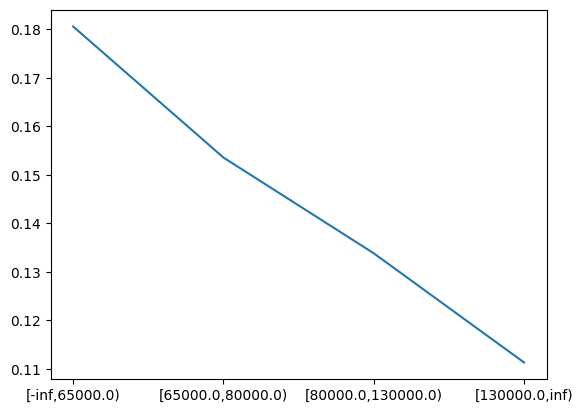

acc_open_past_24mths
4
4


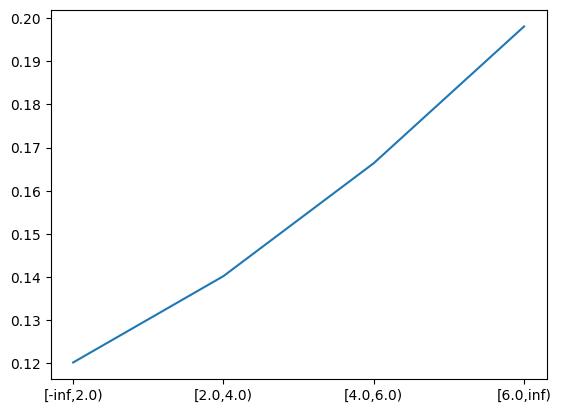

In [ ]:
for key in valid_woe_bins.keys():
  fig, ax = plt.subplots()
  bins[key]
  print(key)
  bad_probs = list(bins[key]['badprob'])
  woe_bins = list(bins[key]['bin'])
  print(len(bad_probs))
  print(len(woe_bins))
  ax.plot(woe_bins, bad_probs)
  plt.show()

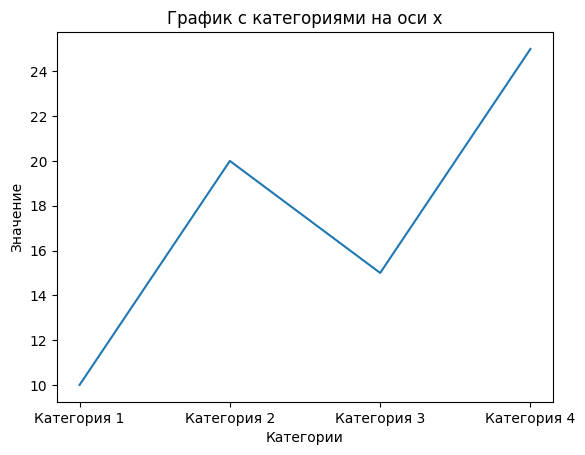

In [ ]:
import matplotlib.pyplot as plt

# Данные для графика
categories = ['Категория 1', 'Категория 2', 'Категория 3', 'Категория 4']
values = [10, 20, 15, 25]

# Создаем фигуру и оси
fig, ax = plt.subplots()

# Строим столбчатую диаграмму
ax.plot(categories, values)

# Настройка осей и заголовка
ax.set_ylabel('Значение')
ax.set_xlabel('Категории')
plt.title('График с категориями на оси x')

# Показываем график
plt.show()
